# <span style="color:green">Mini-Project 1: Investigating Controls on Earth’s Surface Temperature

### Made by Emma Holtzman emma.holtzman@temple.edu
Made for Observing and Modeling Climate Change course at Temple University: Mini Project 1

This notebook was designed in order to explain and analyze various aspects of CLimate Change. Different factors were used in order to highlight how Climate Change is happening and affecting the Earth. By looking at the history of the Earth in regards to greenhouse gas concentrations and surface temperatures, one is able to understand what is going on and why. This notebook attempts to break this down in order to decipher and translate this information regarding Climate Change.

![](https://upload.wikimedia.org/wikipedia/commons/c/cb/The_Blue_Marble_%28remastered%29.jpg)

In [1]:
import pandas as pd                          
import matplotlib.pyplot as plt 
import numpy as np
import cmocean 

%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6   

In [2]:
#Importing data sets
#Greenhouse Gas Concentration Datasets
CO2_MaunaLoa = pd.read_csv('./data/greenhouse_gases/CO2_MaunaLoa_TimeSeries.csv',parse_dates=['Date'])
CO2_NOAA = pd.read_csv('./data/greenhouse_gases/CO2_NOAA_TimeSeries.csv',parse_dates=['Date'])
CO2_WDCGG = pd.read_csv('./data/greenhouse_gases/CO2_WDCGG_TimeSeries.csv',parse_dates=['Date'])
CH4_NOAA = pd.read_csv('./data/greenhouse_gases/NOAA_CH4.csv')
N2O_WDCGG = pd.read_csv('./data/greenhouse_gases/WDCGG_N2O.csv')

#Carbon Emission Datasets
FFE_Type = pd.read_csv('./data/greenhouse_gases/Fossil_Fuel_Emission_By_Type.csv')
Global_CBudget = pd.read_csv('./data/greenhouse_gases/Global_C_Budget_2022.csv')
Nation_FFE = pd.read_csv('./data/greenhouse_gases/Nation_Fossil_Fuel_Emissions.csv')

#Global Average Surface Temperature Datasets
    #Annual global mean surface air temperature datasets
gmt_Berkeley = pd.read_csv('./data/temp/gmt_Berkeley_Earth.csv')
gmt_Era5 = pd.read_csv('./data/temp/gmt_ERA5.csv')
gmt_GISTEMP = pd.read_csv('./data/temp/gmt_GISTEMP.csv')
gmt_HadCRUT5 = pd.read_csv('./data/temp/gmt_HadCRUT5.csv')
gmt_JRA = pd.read_csv('./data/temp/gmt_JRA-55.csv')
gmt_NOAA = pd.read_csv('./data/temp/gmt_NOAAGlobalTemp.csv')
    #Annual global mean surface air temperature over land
lsat_Berkeley = pd.read_csv('./data/temp/lsat_Berkeley_Earth_Land.csv')
lsat_CRUTEM5 = pd.read_csv('./data/temp/lsat_CRUTEM5.csv')
    #Annual global mean surface temperature over the ocean
sst_ERSST = pd.read_csv('./data/temp/sst_ERSSTv5.csv')
sst_HadSST3 = pd.read_csv('./data/temp/sst_HadSST3.csv')
sst_HadSST4 = pd.read_csv('./data/temp/sst_HadSST4.csv')

#NASA GISS-E2 Model Output
NASA_sim = pd.read_csv('./data/model_results/NASA_GISS_Response_To_Forcings.csv')
Obs_Temp = pd.read_csv('./data/model_results/Observed_Temps.csv')

In [3]:
#Converting dates from integers into readable dates of time
Calendar_Date_CH4_NOAA = pd.to_datetime(CH4_NOAA[['Year','Month']].assign(day=1))
Calendar_Date_N2O_WDCGG = pd.to_datetime(N2O_WDCGG[['Year','Month']].assign(day=1))

In [4]:
#Adding a new column into the datasets containing these dates
CH4_NOAA['Date'] = Calendar_Date_CH4_NOAA
N2O_WDCGG['Date'] = Calendar_Date_N2O_WDCGG

# <span style="color:maroon"> Introduction

<span style="color:red"> #1/2
<span style="color:black"> A steady state climate is one in which the incoming shortwave solar radiation is equal to the outgoing longwave radiation. Solar radiation is pivitol to controlling the Earth's temperature because it can either be used as latent heat (phase changes with no temperature change) or sensible heat (temperature chage). When the incoming and outgoing radiations are not equal, the temperature of the Earth varies. This is very important when understanding climate change because greenhouse gases will trap outgoing radiation and throw off this balance. An imprtant thing to note is that this exploration describes three greenhouse gases: CO2, CH4, and N2O. N2 (Nitrogen) is not explored because it is not a greenhouse gas. This is because it has a different structure than the other molecules causing it to be unable to trap infared radiation. This notebook will go through the effects of this and further explain how this impacts the Earth's temperature.


# <span style="color:maroon"> Analysis

In [5]:
#function defining the percent change for each greenhouse gas
def perc_change (concentration, gas= 'CO2'):  
    if gas == 'CO2':
        pchange = (concentration - 280)/280*100
    if gas == 'CH4':
        pchange = (concentration - 700)/700*100
    if gas == 'N2O':
        pchange = (concentration-280)/280 *100
    return gas, pchange
        

In [6]:
CO2_lastyr = CO2_NOAA[-13:-1]

In [7]:
CO2_ppm = CO2_lastyr['NOAA CO2 (ppm)']
CO2_ppm.mean()  #annual average amount of CO2 for last year

417.06083333333345

In [8]:
CH4_lastyr = CH4_NOAA[-13:-1]

In [9]:
CH4_ppb = CH4_lastyr['NOAA CH4 (ppb)']
CH4_ppb.mean() #annual average amount of CH4 for last year

1910.675833333333

In [10]:
N2O_lastyr = N2O_WDCGG[-13:-1]

In [11]:
N2O_ppb = N2O_lastyr['WDCGG N2O (ppb)']
N2O_ppb.mean() #annual average amount of N2O for last year

334.39166666666665

In [12]:
perc_change(417.06, gas='CO2')

('CO2', 48.949999999999996)

In [13]:
perc_change(1910.68, gas='CH4')

('CH4', 172.95428571428573)

In [14]:
perc_change(334.39, gas='N2O')

('N2O', 19.424999999999994)

<span style="color:red"> #3
<span style="color:black">The annual average of these greenhouse gases are as follows: CO2: 417.06 ppm, CH4: 1910.68 ppb, and N2O: 334.39 ppb. The provided pre-industrial levels of these gases were approximately CO2: ~280 ppm, 
C  : ~700 pp, and N2 O: ~280 p. pbBased on these annual averages and thpre-industrial levels, we can calculate a percent change for each gas: CO2: 48.95%, CH4: 172.95%, and N2O: 19.42%. 

<span style="color:red"> #4
<span style="color:black">Based on these calculated percent changes, it is evident that the amount of CH4 has increased much more than the other greehouse gases.

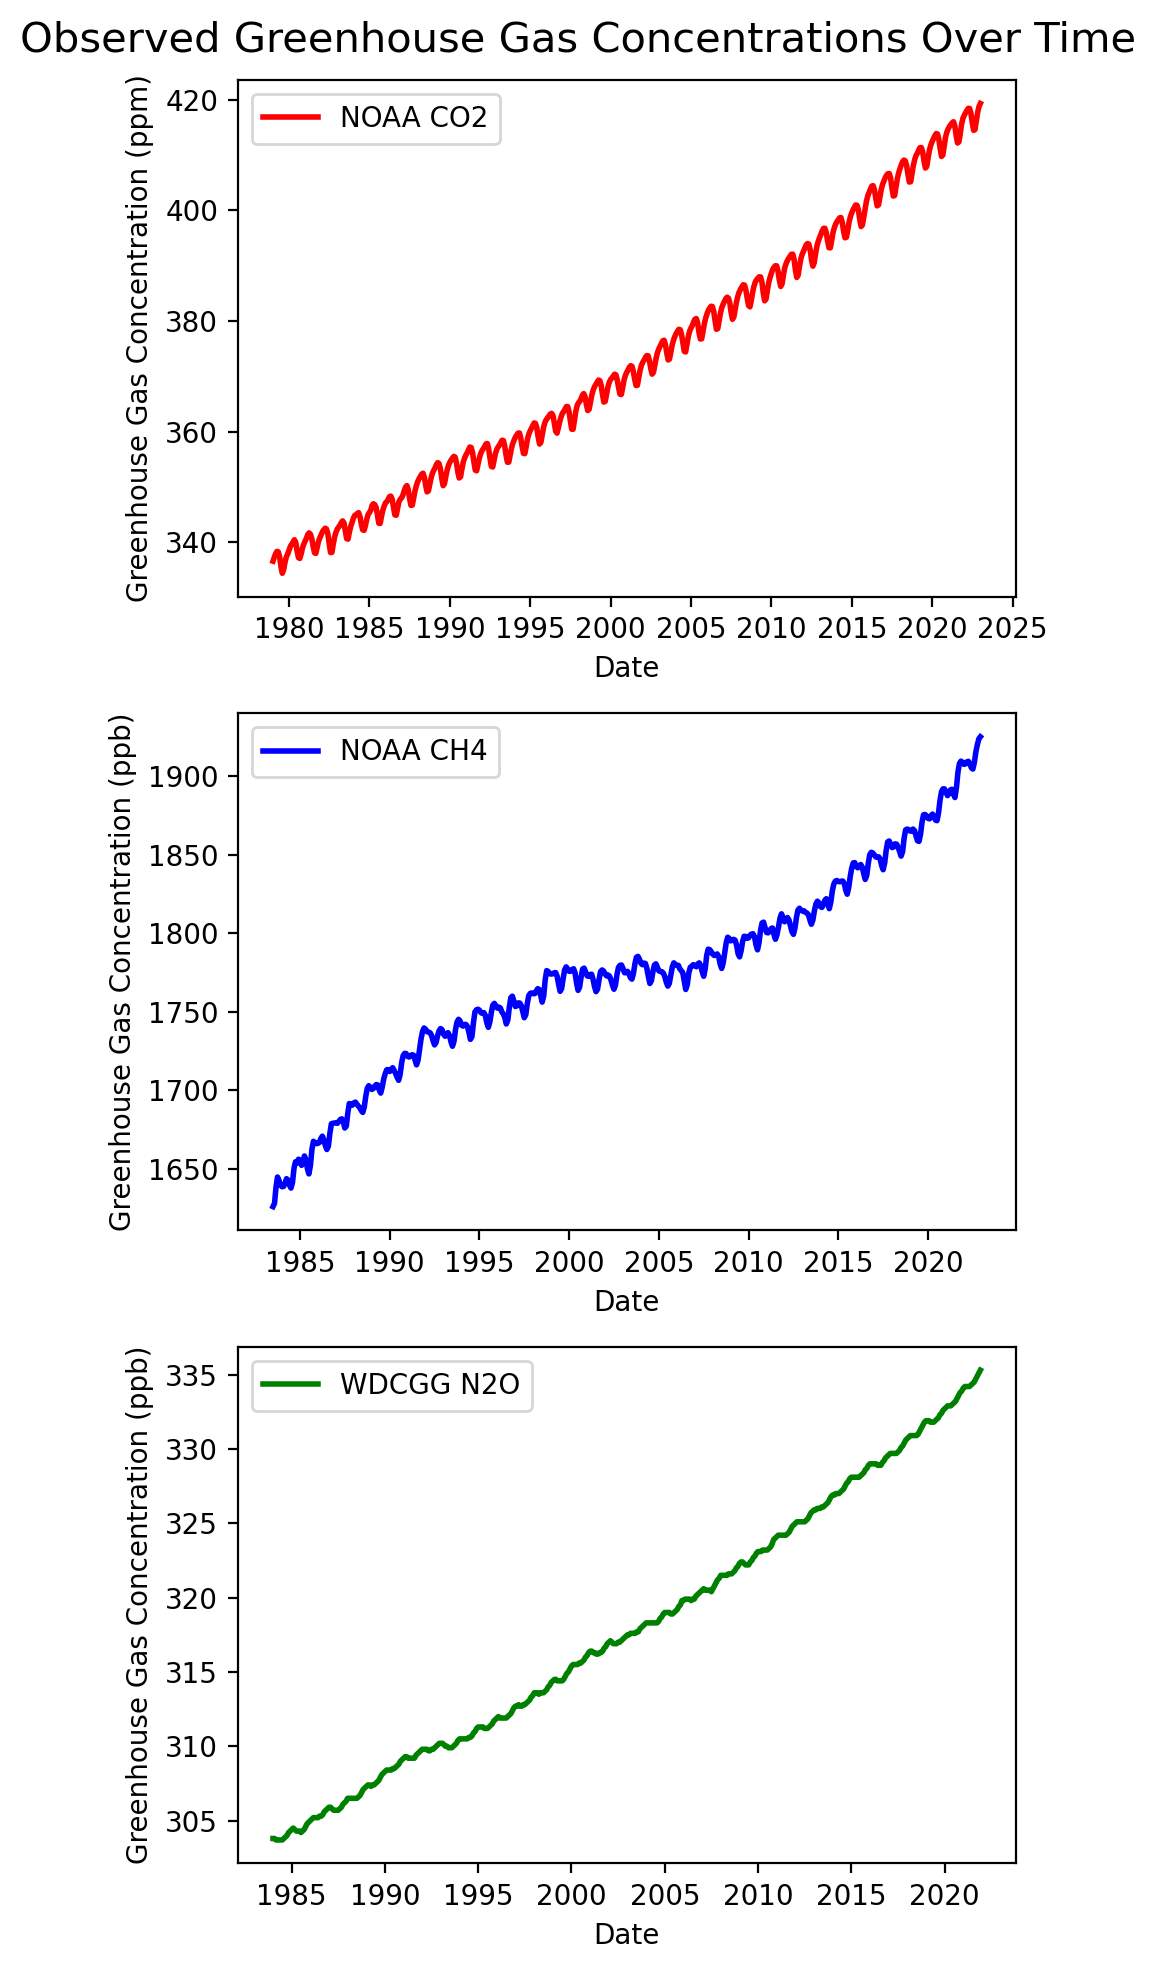

In [15]:
#plots of the greenhouse gas concentrations from ~1980 to present day

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (5, 10))
fig.suptitle('Observed Greenhouse Gas Concentrations Over Time', fontsize=15)
ax1.plot(CO2_NOAA['Date'], CO2_NOAA['NOAA CO2 (ppm)'], linewidth=2,label='NOAA CO2', color='red')
ax2.plot(CH4_NOAA['Date'], CH4_NOAA['NOAA CH4 (ppb)'], linewidth=2, label='NOAA CH4', color='blue')
ax3.plot(N2O_WDCGG['Date'], N2O_WDCGG['WDCGG N2O (ppb)'], linewidth=2, label='WDCGG N2O', color='green')
ax1.legend()
ax1.set_ylabel('Greenhouse Gas Concentration (ppm)')
ax1.set_xlabel('Date')
ax2.legend()
ax2.set_ylabel('Greenhouse Gas Concentration (ppb)')
ax2.set_xlabel('Date')
ax3.legend()
ax3.set_ylabel('Greenhouse Gas Concentration (ppb)')
ax3.set_xlabel('Date')
plt.tight_layout()

Figure 1: This figure displays the concentrations of three different greenhouse gases plotted over time. The greenhouse gases are CO2, CH4, and N2O. It is clear there is an upwards trend in concentrations of these overtime. CO2 rose by about 80 ppm, CH4 rose by about 250 ppb, and N2O rose by about 30 ppb.

<span style="color:red"> #5
<span style="color:black"> Between 800,000 BCE and now, CO2 concentrations have oscillated between [170 and 300 ppm](https://climate.esa.int/en/evidence/what-is-climate-and-climate-change/). This variability is due to glacial and interglacial periods that exist over thousands of years. The natural varibility has been adjusted by humans as anthropogenic forces have caused a distinct and large disturbance in this natural variation in CO2 concentrations. Anthropogeic forcing has caused these concentrations to increase to over 400 ppm which is an all time record. The natural variability was measured by studying ice cores and their [oxygen isotopes](https://nsidc.org/learn/ask-scientist/core-climate-history#:~:text=Once%20an%20air%20mass%20reaches,the%20lower%20the%20ancient%20temperature.).

<span style="color:red"> #6 
<span style="color:black"> There is a temporal pattern in the timeseries of CO2 that lies aorund post-World War II  and 2020. These are times when the CO2 concentration began to peak due to anthropogenic causes. World War II and present time have had much larger CO2 outputs than other times in history.


<span style="color:red"> #8
<span style="color:black"> All three of the graphed greenhouse gases display a positive slope, therfore an increase in the concentrations of all of the gases in the atmosphere over time. CH4, however has a period from about 2000-2005 where the concentration of the gas remains relatively constant rather than increasing like its counterparts.

In [16]:
CO2_MaunaLoa_lastyr = CO2_MaunaLoa[-13:-1]

In [17]:
CO2_WDCGG_lastyr = CO2_WDCGG[-13:-1]

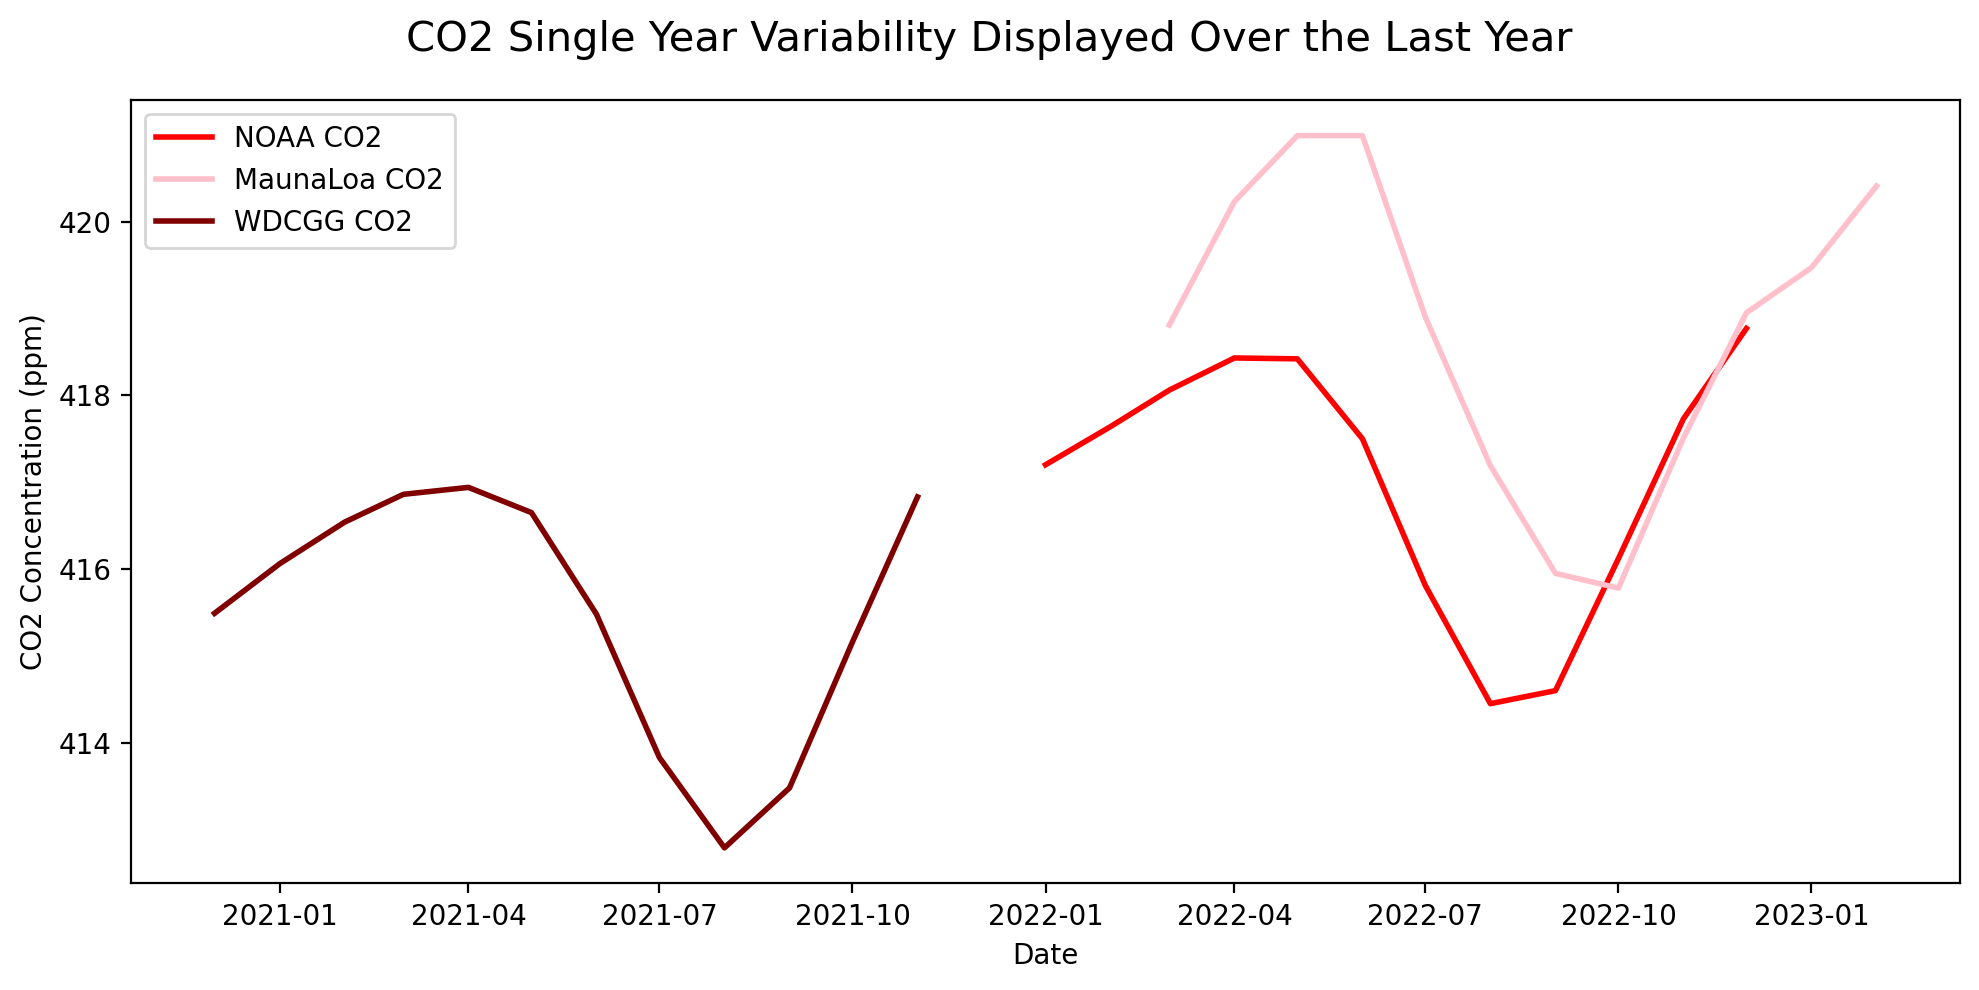

In [18]:
#plot comparing different locations measurements of the CO2 concentration over the last year

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))
fig.suptitle('CO2 Single Year Variability Displayed Over the Last Year', fontsize=15)
ax.plot(CO2_lastyr['Date'], CO2_lastyr['NOAA CO2 (ppm)'], linewidth=2,label='NOAA CO2', color='red')
ax.plot(CO2_MaunaLoa_lastyr['Date'], CO2_MaunaLoa_lastyr['Mauna Loa CO2 (ppm)'], linewidth=2, label='MaunaLoa CO2', color='pink')
ax.plot(CO2_WDCGG_lastyr['Date'], CO2_WDCGG_lastyr['WDCGG CO2 (ppm)'], linewidth=2, label='WDCGG CO2', color='maroon')

ax.legend()
ax.set_ylabel('CO2 Concentration (ppm)')
ax.set_xlabel('Date')

plt.tight_layout()

Figure 2: This plot displays the year-to-year flux in CO2 concentrations. There are three data sets plotted, each with CO2 concentration measurments in ppm that were taken by different companies. Each show a years worth of data. NOAA and Mauna Loa both are plotted for the imediate last years worth of data, and WDCGG displays measurements from the year of 2021. It is highlighted by the repitition of the pattern in each line, that there is a cycle that occurs with CO2 concentrations. There is a peal around April and a dip around July/August.

<span style="color:red"> #11 
<span style="color:black"> NOAA collects its CO2 data from many laboratories around the world, with a heavy concentration of their laboratories in the United States. WDCGG also collects from a multitude of labs across the globe, with a large concentration of them in Europe. Both NOAA and WDCGG have a generally even distribution around the world, though. Mauna Loa, on the other hand, only collects data from their observatory in Hawaii. This affects their data, skewing it as they are only taking data from one place. NOAA and WDCGG take data from dozens of places and therfore can average the data to get a more accurate measurement to represent the entire Earth. 

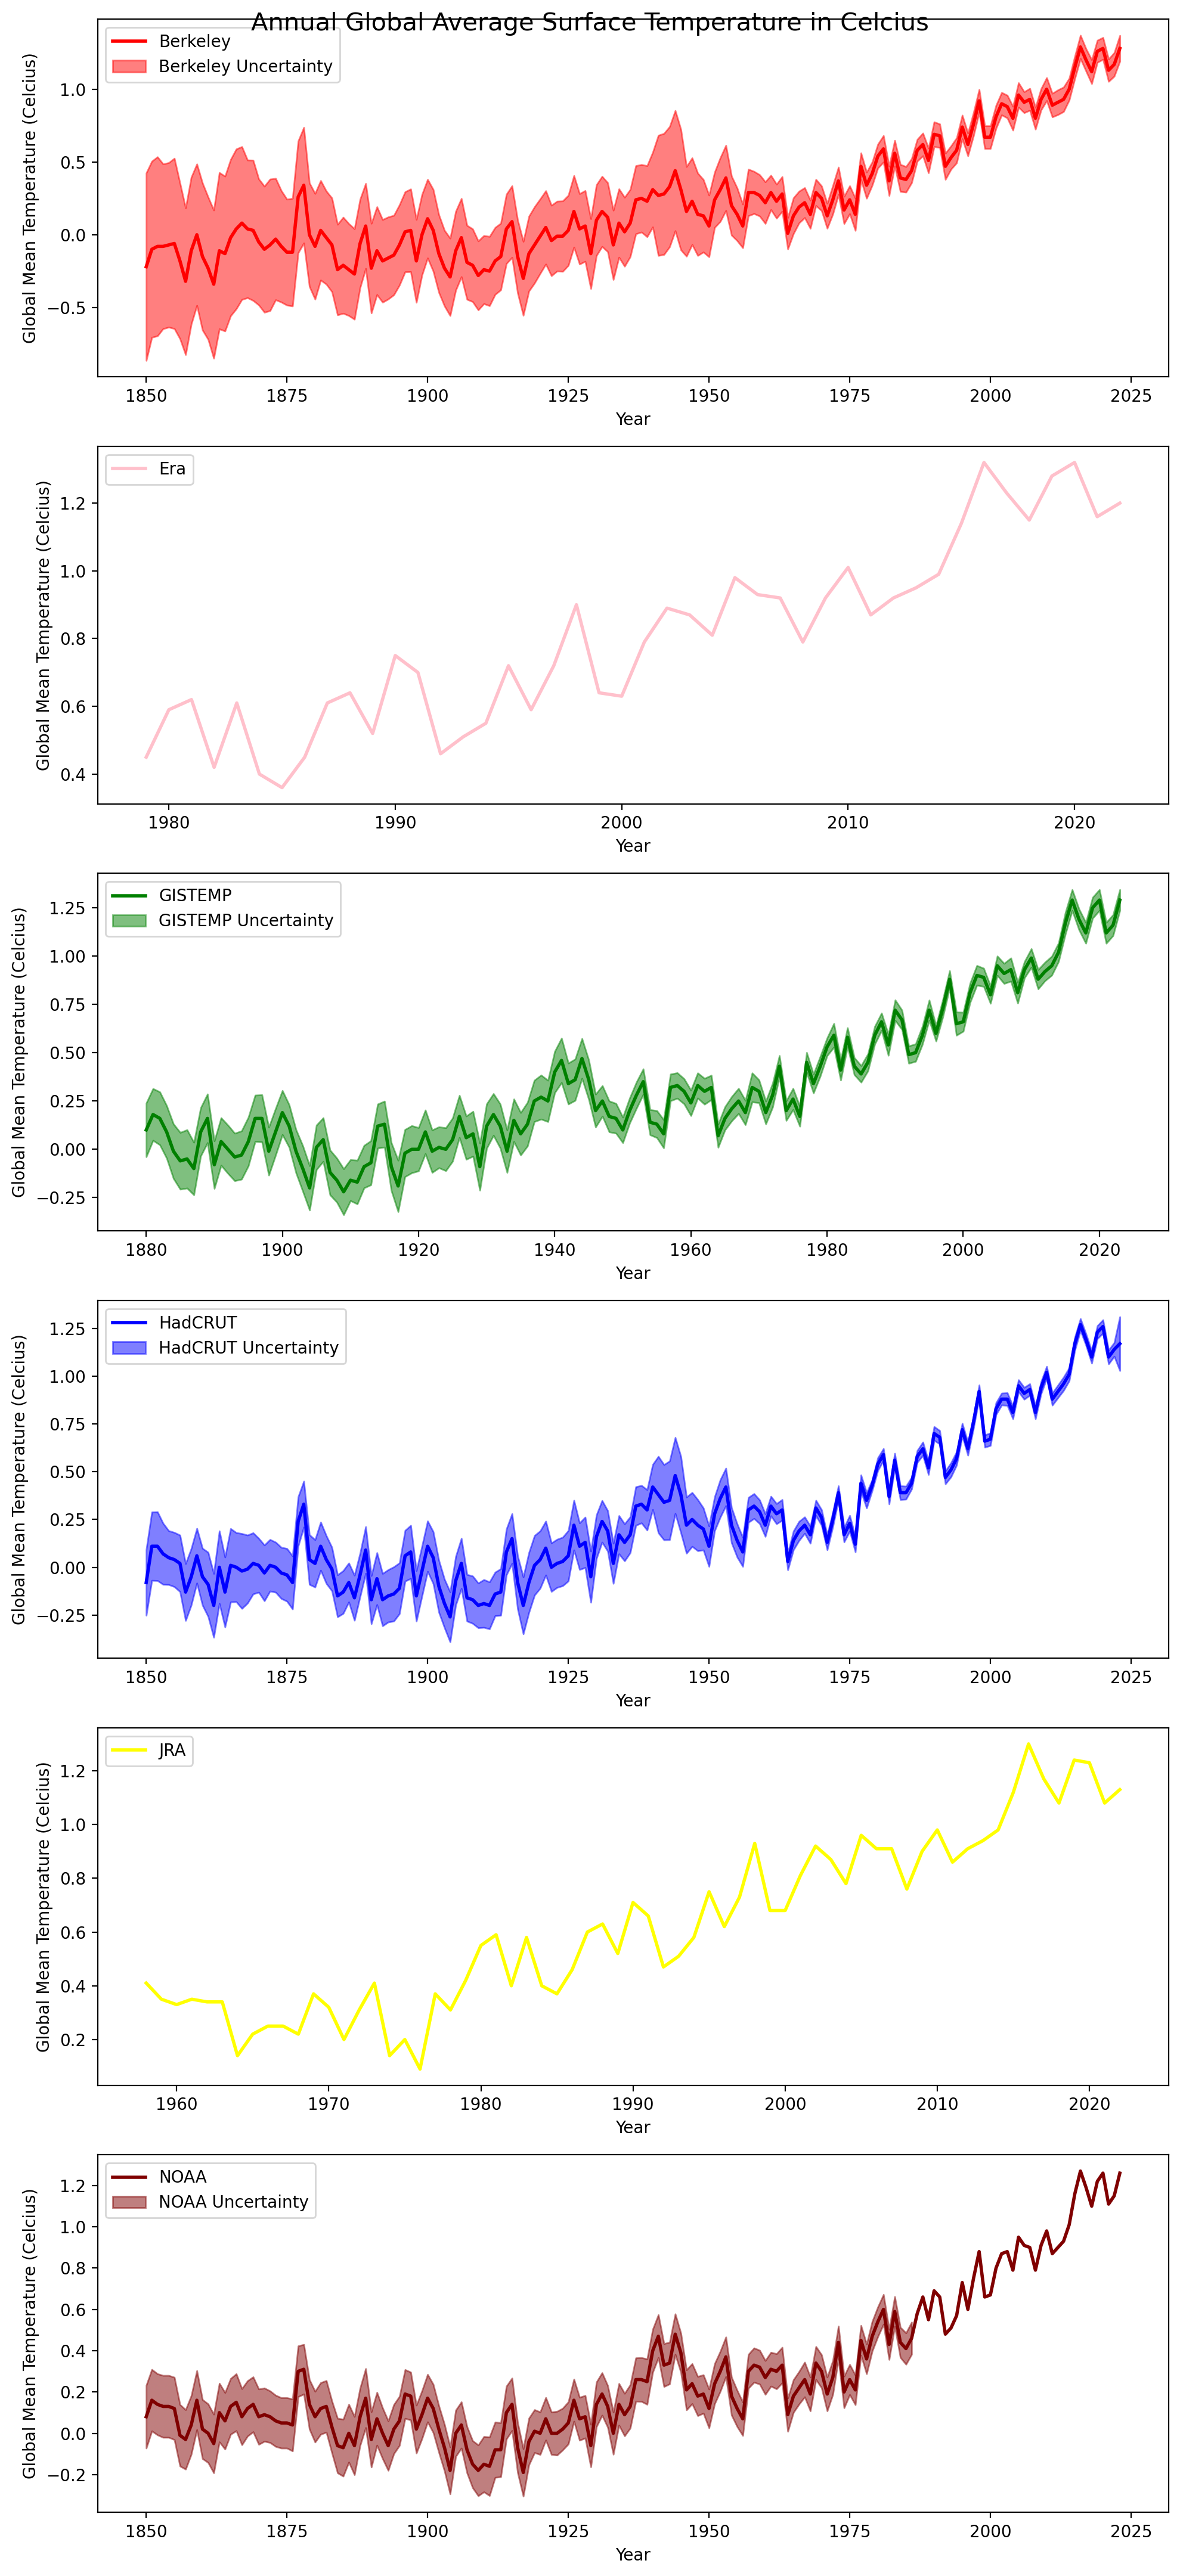

In [19]:
#plots displaying GMT in degrees celcius

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows = 6, ncols = 1, figsize = (10, 22))
fig.suptitle('Annual Global Average Surface Temperature in Celcius', fontsize=15)
ax1.plot(gmt_Berkeley ['Year'], gmt_Berkeley['Berkeley Earth (degC)'], linewidth=2,label='Berkeley', color='red')
ax1.fill_between(gmt_Berkeley ['Year'], gmt_Berkeley['Berkeley Earth (degC)']+gmt_Berkeley ['Berkeley Earth uncertainty'], gmt_Berkeley['Berkeley Earth (degC)']-gmt_Berkeley ['Berkeley Earth uncertainty'], label='Berkeley Uncertainty', alpha=0.5,color='red')

ax2.plot(gmt_Era5 ['Year'], gmt_Era5['ERA5 (degC)'], linewidth=2,label='Era', color='pink')

ax3.plot(gmt_GISTEMP  ['Year'], gmt_GISTEMP ['GISTEMP (degC)'], linewidth=2,label='GISTEMP', color='green')
ax3.fill_between(gmt_GISTEMP  ['Year'], gmt_GISTEMP ['GISTEMP (degC)']+gmt_GISTEMP  ['GISTEMP uncertainty'], gmt_GISTEMP ['GISTEMP (degC)']-gmt_GISTEMP  ['GISTEMP uncertainty'], label='GISTEMP Uncertainty', alpha=0.5,color='green')

ax4.plot(gmt_HadCRUT5 ['Year'], gmt_HadCRUT5['HadCRUT5 (degC)'], linewidth=2,label='HadCRUT', color='blue')
ax4.fill_between(gmt_HadCRUT5 ['Year'], gmt_HadCRUT5['HadCRUT5 (degC)']+gmt_HadCRUT5 ['HadCRUT5 uncertainty'], gmt_HadCRUT5['HadCRUT5 (degC)']-gmt_HadCRUT5 ['HadCRUT5 uncertainty'], label='HadCRUT Uncertainty', alpha=0.5,color='blue')

ax5.plot(gmt_JRA ['Year'], gmt_JRA['JRA-55 (degC)'], linewidth=2,label='JRA', color='yellow')

ax6.plot(gmt_NOAA ['Year'], gmt_NOAA['NOAAGlobalTemp (degC)'], linewidth=2,label='NOAA', color='maroon')
ax6.fill_between(gmt_NOAA ['Year'], gmt_NOAA['NOAAGlobalTemp (degC)']+gmt_NOAA['NOAAGlobalTemp uncertainty'], gmt_NOAA['NOAAGlobalTemp (degC)']-gmt_NOAA['NOAAGlobalTemp uncertainty'], label='NOAA Uncertainty', alpha=0.5,color='maroon')

ax1.legend()
ax1.set_ylabel('Global Mean Temperature (Celcius)')
ax1.set_xlabel('Year')
ax2.legend()
ax2.set_ylabel('Global Mean Temperature (Celcius)')
ax2.set_xlabel('Year')
ax3.legend()
ax3.set_ylabel('Global Mean Temperature (Celcius)')
ax3.set_xlabel('Year')
ax4.legend()
ax4.set_ylabel('Global Mean Temperature (Celcius)')
ax4.set_xlabel('Year')
ax5.legend()
ax5.set_ylabel('Global Mean Temperature (Celcius)')
ax5.set_xlabel('Year')
ax6.legend()
ax6.set_ylabel('Global Mean Temperature (Celcius)')
ax6.set_xlabel('Year')

plt.tight_layout()

Figure 3: This series of graphs make up Figure 6 which describes the Global Mean Surface Temperature year to year  in degrees Celcius. Each graph represents a different set of measurements some beginning in the mid 1800's and some in the mid 1900's. They all measure up to present time and each data set is from a different corporation or measurer. A few graphs include uncertainty within the data, the larger the uncertainty the less accurate the surface temperature measurement is. Even with uncertainty factored in, there is a clear upward trend in the Global Mean Surface Temperature across time.

In [20]:
#funstion to convert celcius to fahrenheit
def c_to_f (x):
    fahrenheit= (x*9/5)+32
    return fahrenheit

In [21]:
#converting datasets to fahrenheit
Berk_f = c_to_f (gmt_Berkeley['Berkeley Earth (degC)'])
ERAf = c_to_f (gmt_Era5['ERA5 (degC)'])
GISTEMPf = c_to_f (gmt_GISTEMP ['GISTEMP (degC)'])
HADf = c_to_f (gmt_HadCRUT5['HadCRUT5 (degC)'])
JRAf = c_to_f (gmt_JRA['JRA-55 (degC)'])
NOAAf = c_to_f(gmt_NOAA['NOAAGlobalTemp (degC)'])

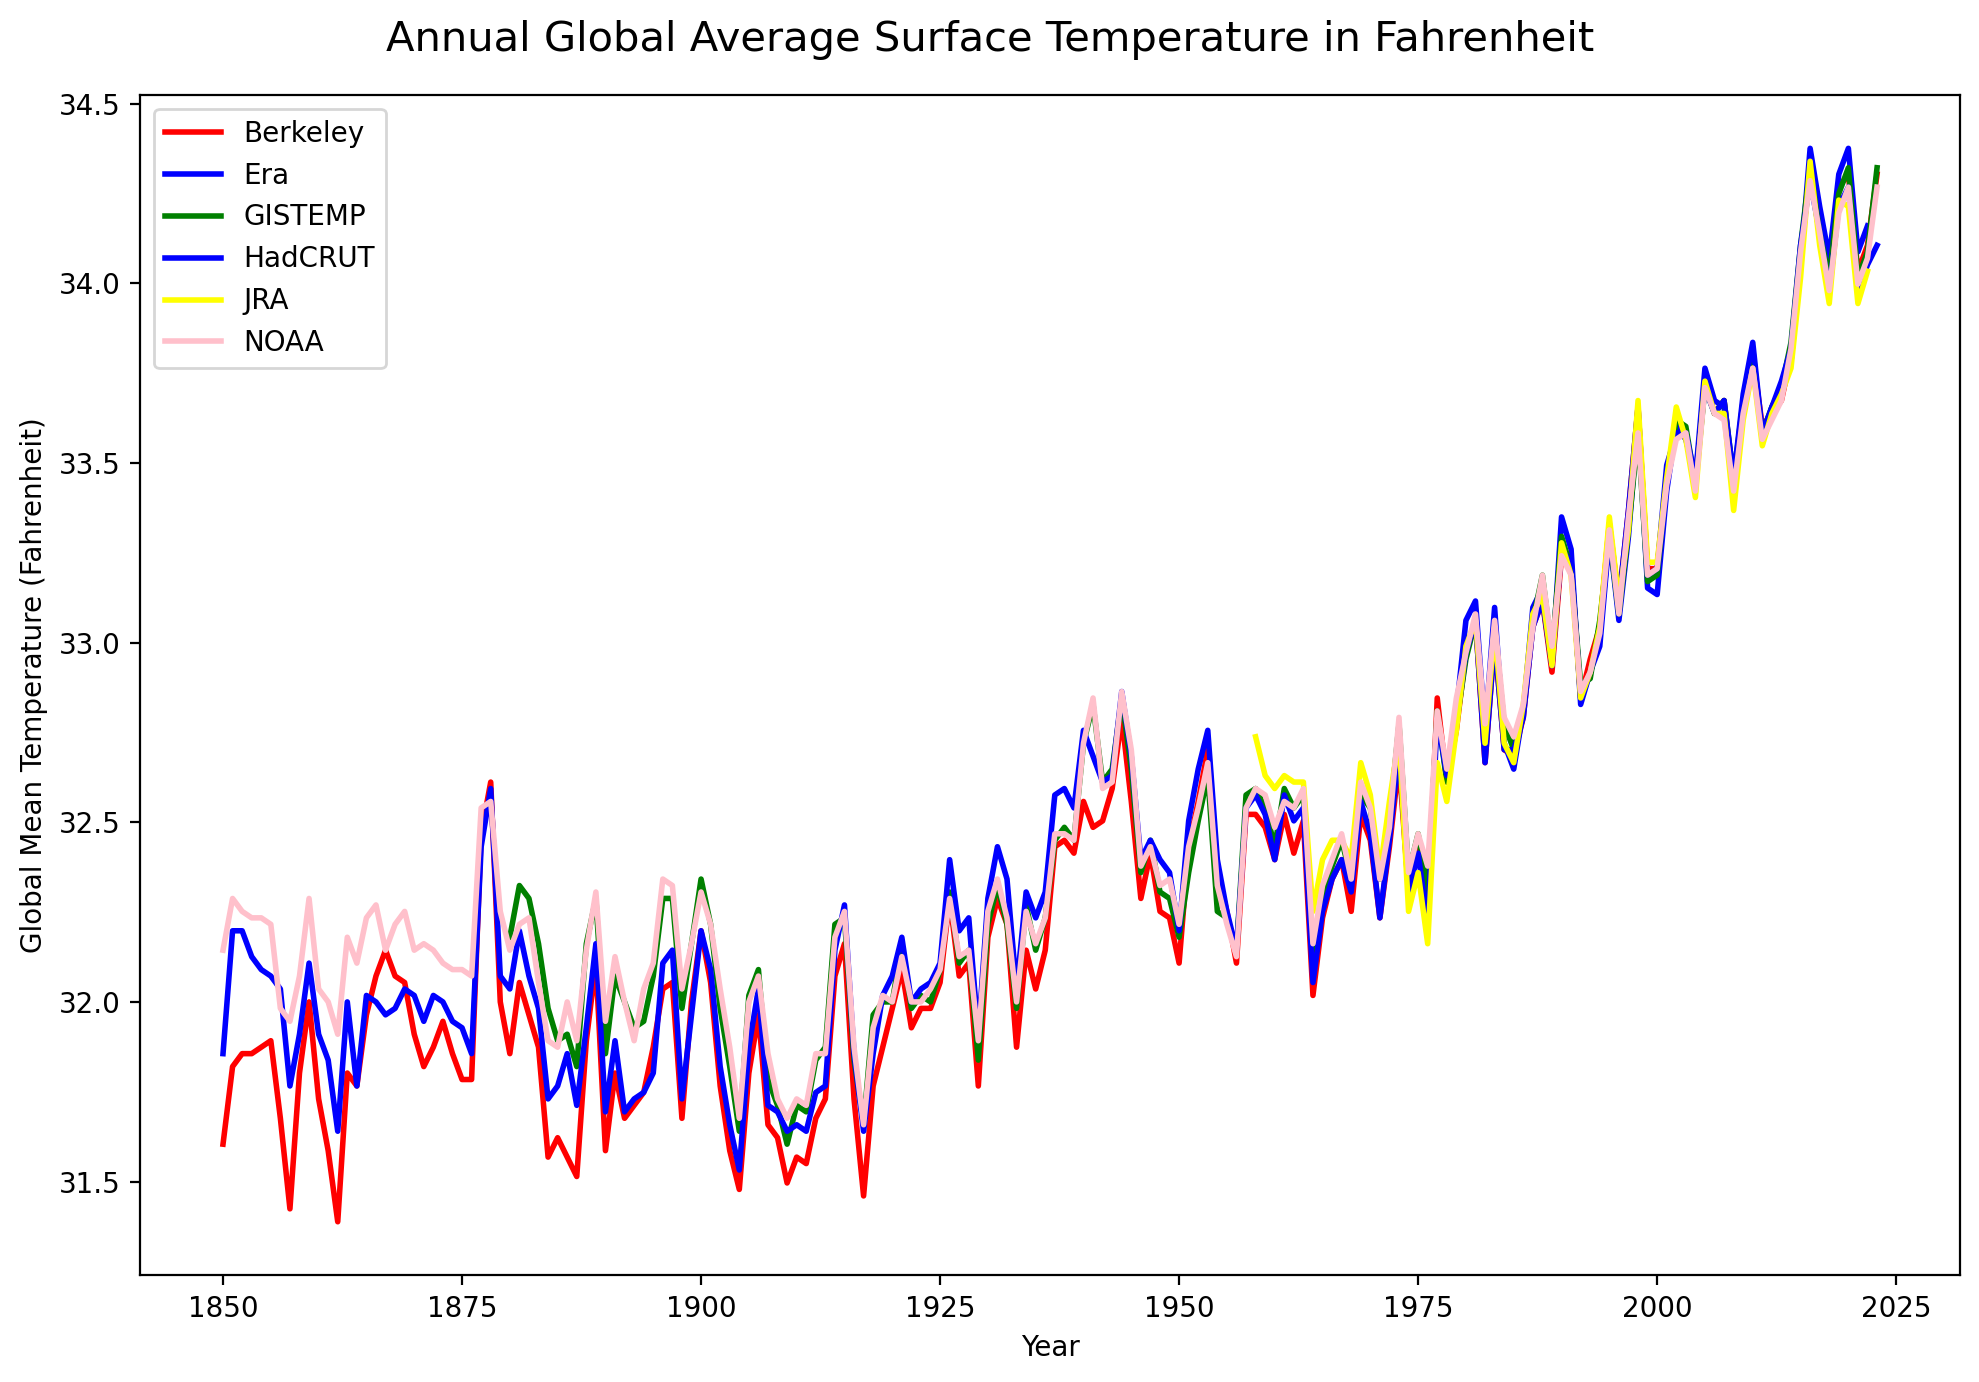

In [22]:
#plots displaying the GMT in fahrenheit

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 7))
fig.suptitle('Annual Global Average Surface Temperature in Fahrenheit', fontsize=15)
ax.plot(gmt_Berkeley ['Year'], Berk_f, linewidth=2,label='Berkeley', color='red')

ax.plot(gmt_Era5 ['Year'], ERAf, linewidth=2,label='Era', color='blue')

ax.plot(gmt_GISTEMP  ['Year'], GISTEMPf, linewidth=2,label='GISTEMP', color='green')

ax.plot(gmt_HadCRUT5 ['Year'], HADf, linewidth=2,label='HadCRUT', color='blue')

ax.plot(gmt_JRA ['Year'], JRAf, linewidth=2,label='JRA', color='yellow')

ax.plot(gmt_NOAA ['Year'], NOAAf, linewidth=2,label='NOAA', color='pink')

ax.legend()
ax.set_ylabel('Global Mean Temperature (Fahrenheit)')
ax.set_xlabel('Year')

plt.tight_layout()

Figure 4: This is a figure created from the same data as used in Figure 6, just communicated in degrees Fahrenheit instead of Celcius. There is some variation between different companies' measurements from around 1850 to 1925, and then all of the lines begin to overlap a lot indicating a high level of accuracy and precision regarding the data. There are many fluxes in temperature over time, indicating regular cycles of flux regarding surface temperature. There is also a clear upwards trend in surface temperature, with levels around 32 degrees in the first section of the graph (1850-1925), and temperatures reaching over 34 degrees celcius present day. 

<span style="color:red"> #13 
<span style="color:black"> The baseline lies around 0-0.2 degrees Celcius (32 degrees Fahrenheit) for the global average temperature. In present times, it is around 1.2 degrees Celcius (34.5 degrees Fahrenheit). This suggests there has been about a 1 degree Celcius (2 degree Fahrenheit) increase in global average temperatures since the beginning of these data sets (1800/1900's).

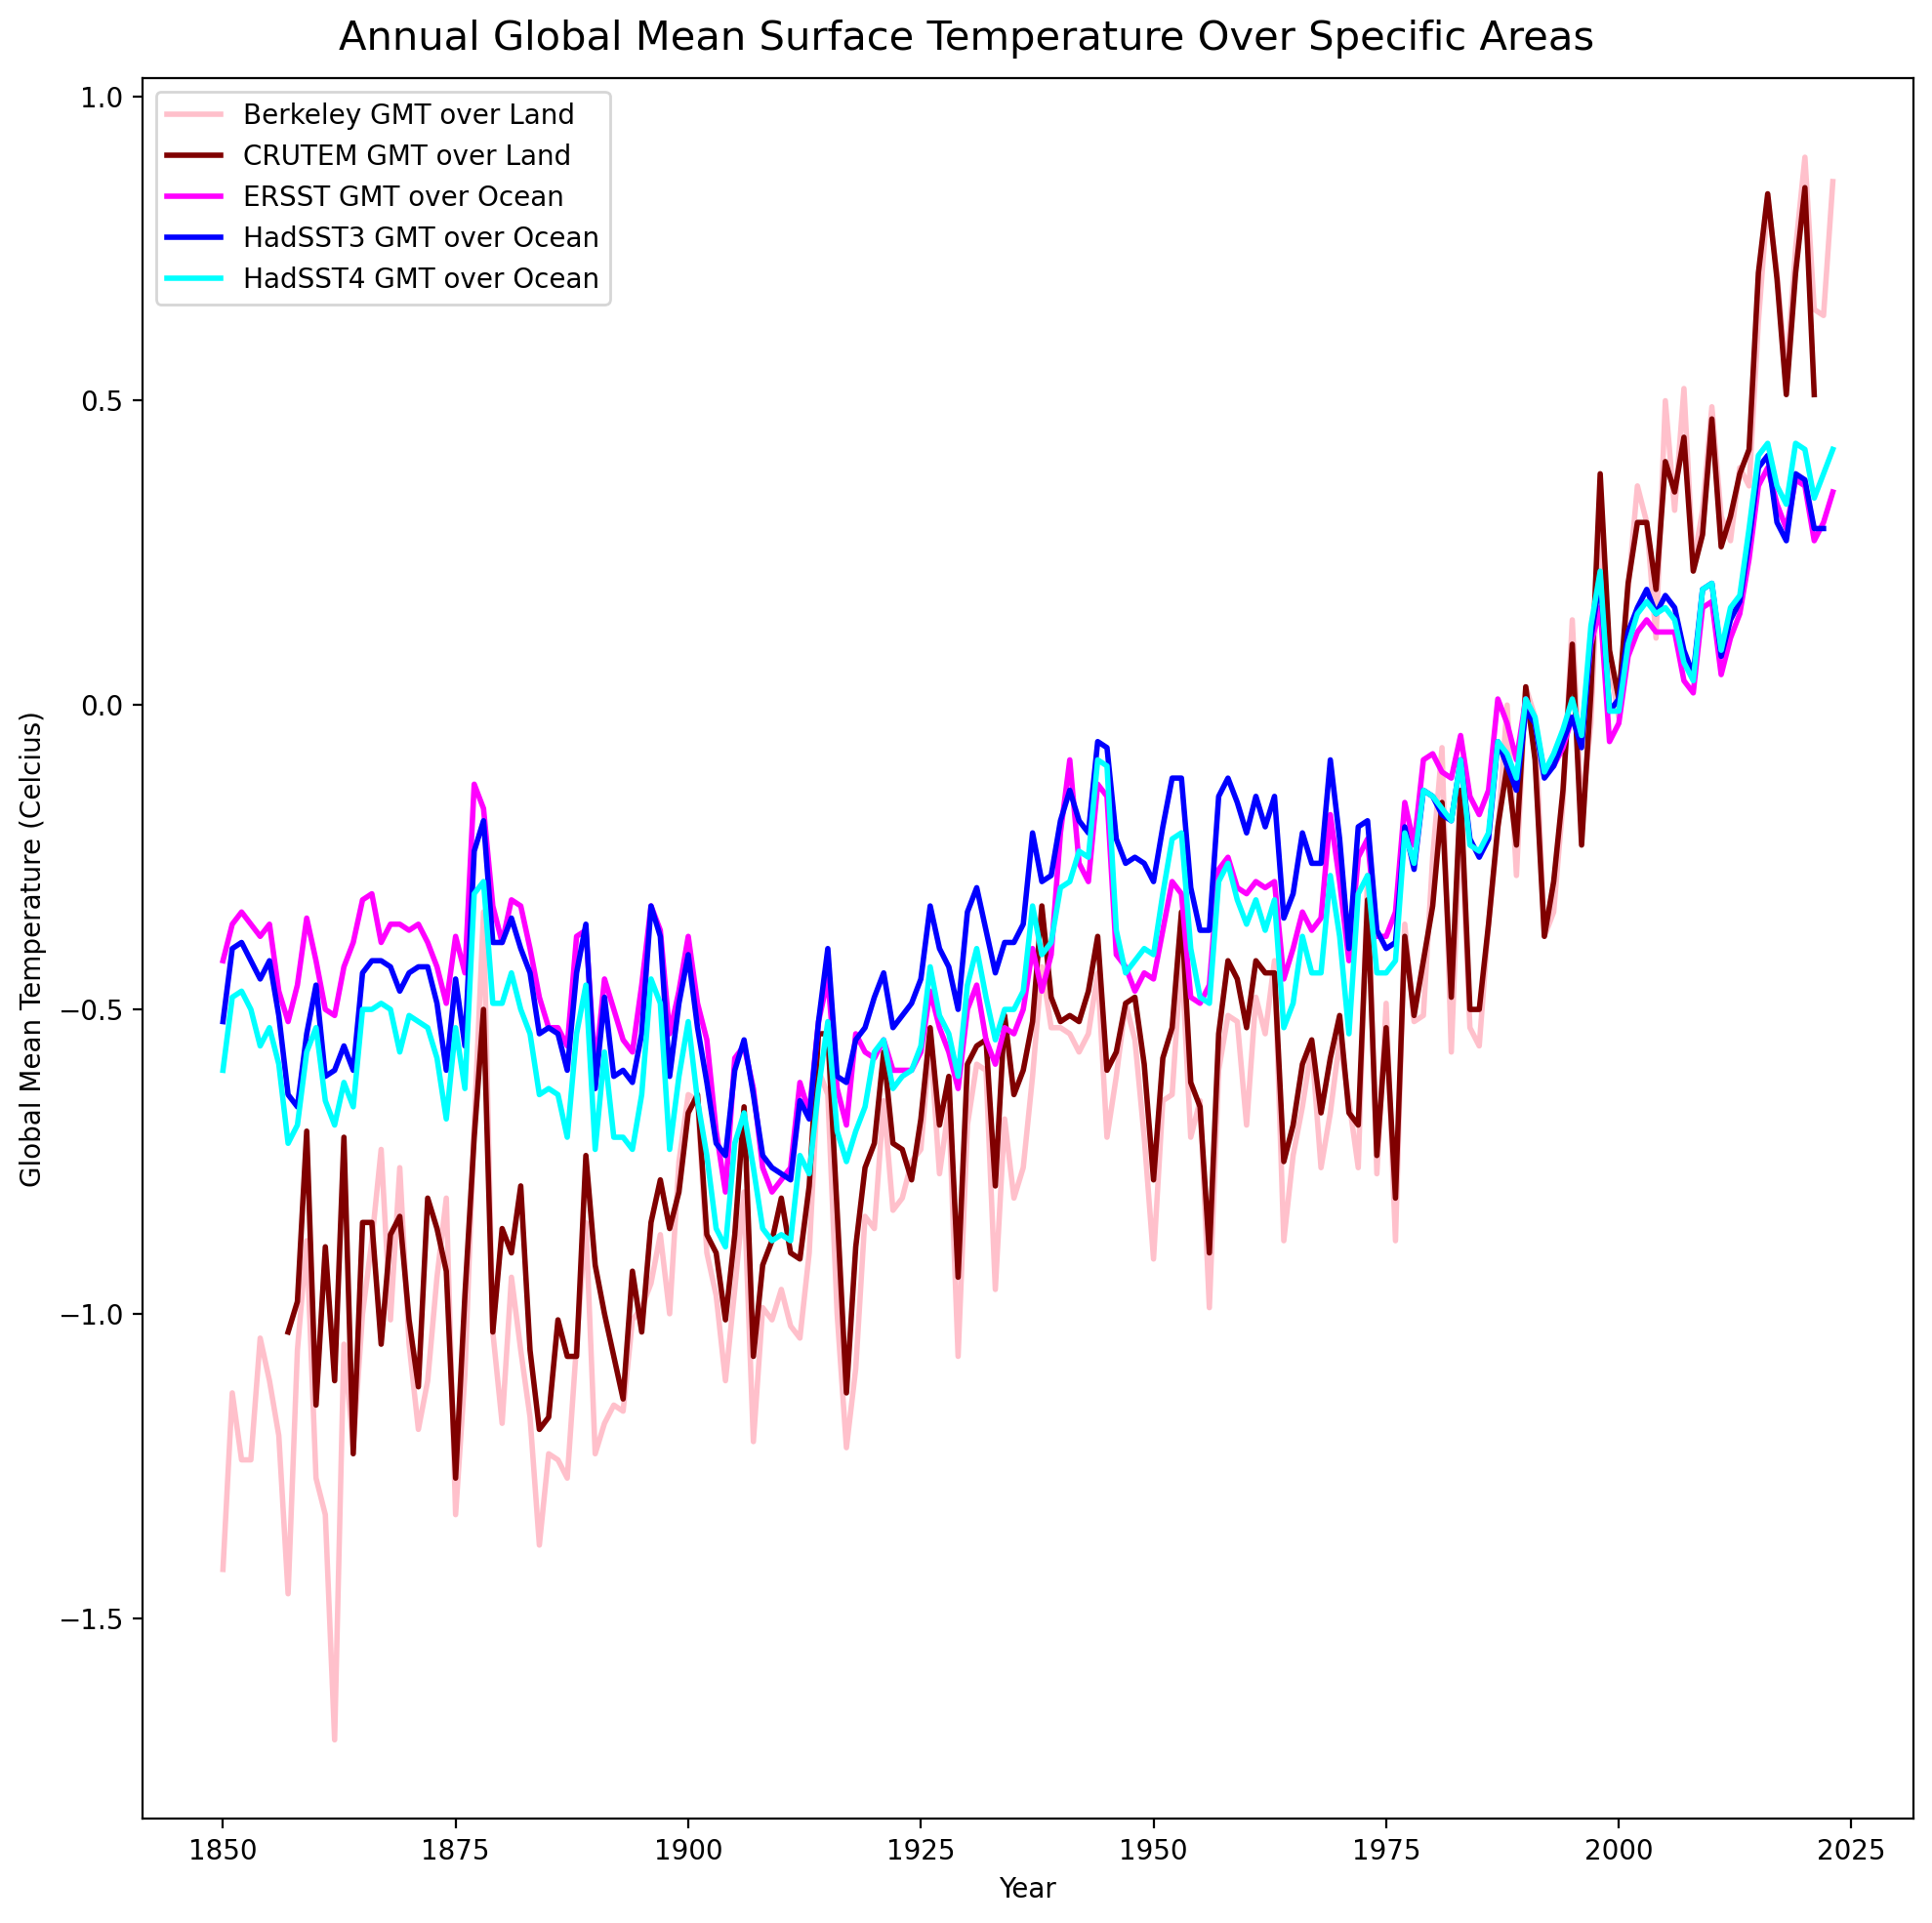

In [23]:
#plot displaying global mean temperature over land and ocean

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 10))
fig.suptitle('Annual Global Mean Surface Temperature Over Specific Areas', fontsize=15)
ax.plot(lsat_Berkeley ['Year'], lsat_Berkeley['Berkeley Earth Land (degC)'], linewidth=2,label='Berkeley GMT over Land', color='pink')

ax.plot(lsat_CRUTEM5 ['Year'], lsat_CRUTEM5['CRUTEM5 (degC)'], linewidth=2,label='CRUTEM GMT over Land', color='maroon')

ax.plot(sst_ERSST  ['Year'], sst_ERSST ['ERSSTv5 (degC)'], linewidth=2,label='ERSST GMT over Ocean', color='magenta')
ax.plot(sst_HadSST3 ['Year'], sst_HadSST3['HadSST3 (degC)'], linewidth=2,label='HadSST3 GMT over Ocean', color='blue')
ax.plot(sst_HadSST4  ['Year'], sst_HadSST4 ['HadSST4 (degC)'], linewidth=2,label='HadSST4 GMT over Ocean', color='cyan')

ax.legend()
ax.set_ylabel('Global Mean Temperature (Celcius)')
ax.set_xlabel('Year')


plt.tight_layout()

Figure 5: Expanding on Figures 3 and 4, this graph highlights how the Global Mean Surface Temperature not only can vary depending on what surface you are measuring over, and how regardless of this an upwards trend is clearly visible in surface temperature. An important thing to note in this graph is that the temperature over the ocean is less than the temperture over the land. This is due to water's high specific heat capacity, causing the temperature of the water to be very low, cooling the air on top of it. Land will heat up faster with an equivalent amount of solar radiation, thus causing the air temperature above land to be higher. This only becomes present after about the year 2000. This suggests something was overpowering this effect in the past. Another thing to note is that the surface tempurature over land has a much steeper gradient than over ocean, highlighting that it is warming faster, due to this effect of the substances having different specific heat capacities.

<span style="color:red"> #14 
<span style="color:black"> Answer in Figure 8 caption^

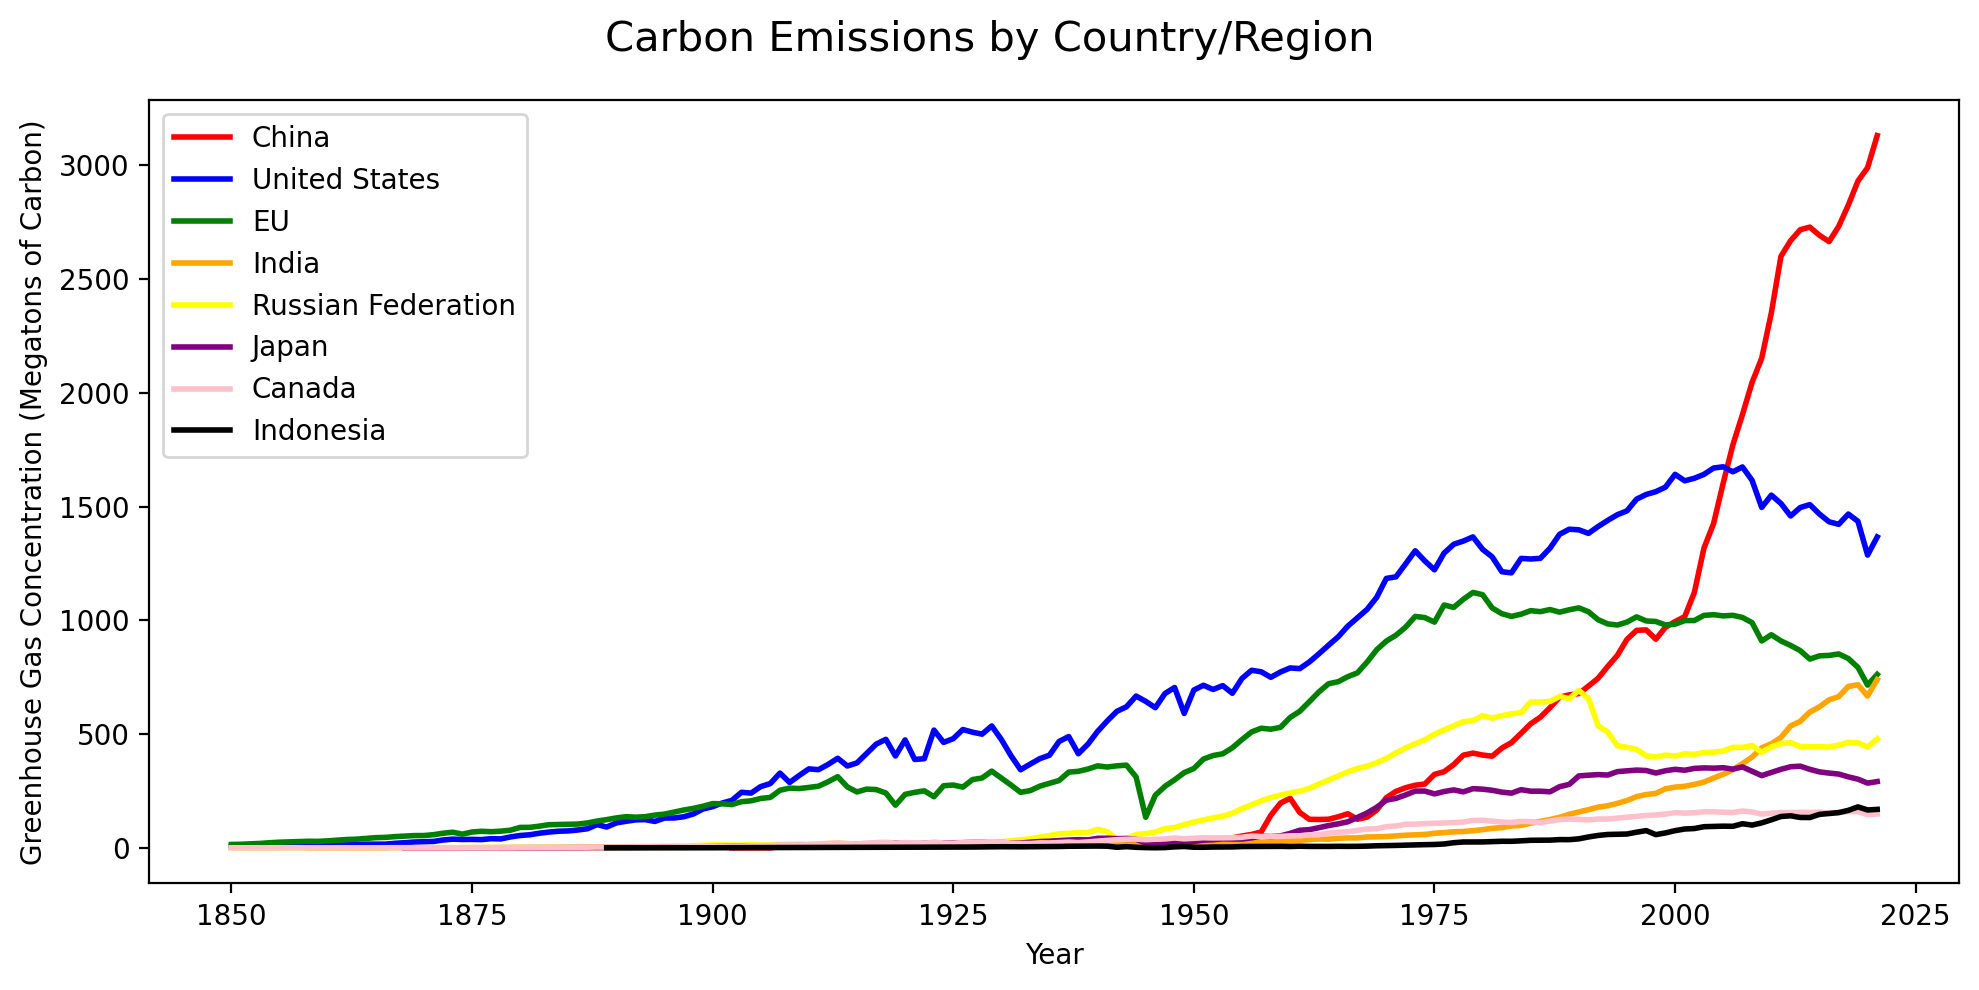

In [24]:
#plot comparing carbon emissions of various countries

fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))
fig.suptitle('Carbon Emissions by Country/Region', fontsize=15)
ax1.plot(Nation_FFE['Year'], Nation_FFE['CHINA (MAINLAND)'], linewidth=2,label='China', color='red')
ax1.plot(Nation_FFE['Year'], Nation_FFE['UNITED STATES OF AMERICA'], linewidth=2, label='United States', color='blue')
ax1.plot(Nation_FFE['Year'], Nation_FFE['EU27'], linewidth=2, label='EU', color='green')
ax1.plot(Nation_FFE['Year'], Nation_FFE['INDIA'], linewidth=2, label='India', color='orange')
ax1.plot(Nation_FFE['Year'], Nation_FFE['RUSSIAN FEDERATION'], linewidth=2, label='Russian Federation', color='yellow')
ax1.plot(Nation_FFE['Year'], Nation_FFE['JAPAN'], linewidth=2, label='Japan', color='purple')
ax1.plot(Nation_FFE['Year'], Nation_FFE['CANADA'], linewidth=2, label='Canada', color='pink')
ax1.plot(Nation_FFE['Year'], Nation_FFE['INDONESIA'], linewidth=2, label='Indonesia', color='black')

ax1.legend()
ax1.set_ylabel('Greenhouse Gas Concentration (Megatons of Carbon)')
ax1.set_xlabel('Year')

plt.tight_layout()

Figure 6: This graph dives into the sources of carbon in the atmosphere by countries. Here, it is clear to see which what the carbon emissions of the top 8 contributors of carbon into the atmosphere. In the last year, China was the highest contributor with the United States in second. There is a clear upwards trend in the amount of carbon that has been emitted overtime.

<span style="color:red"> #9 
<span style="color:black"> The top emitting countries in order are China, United States, European Union, India, Russia, Japan, Indonesia, and Canada.

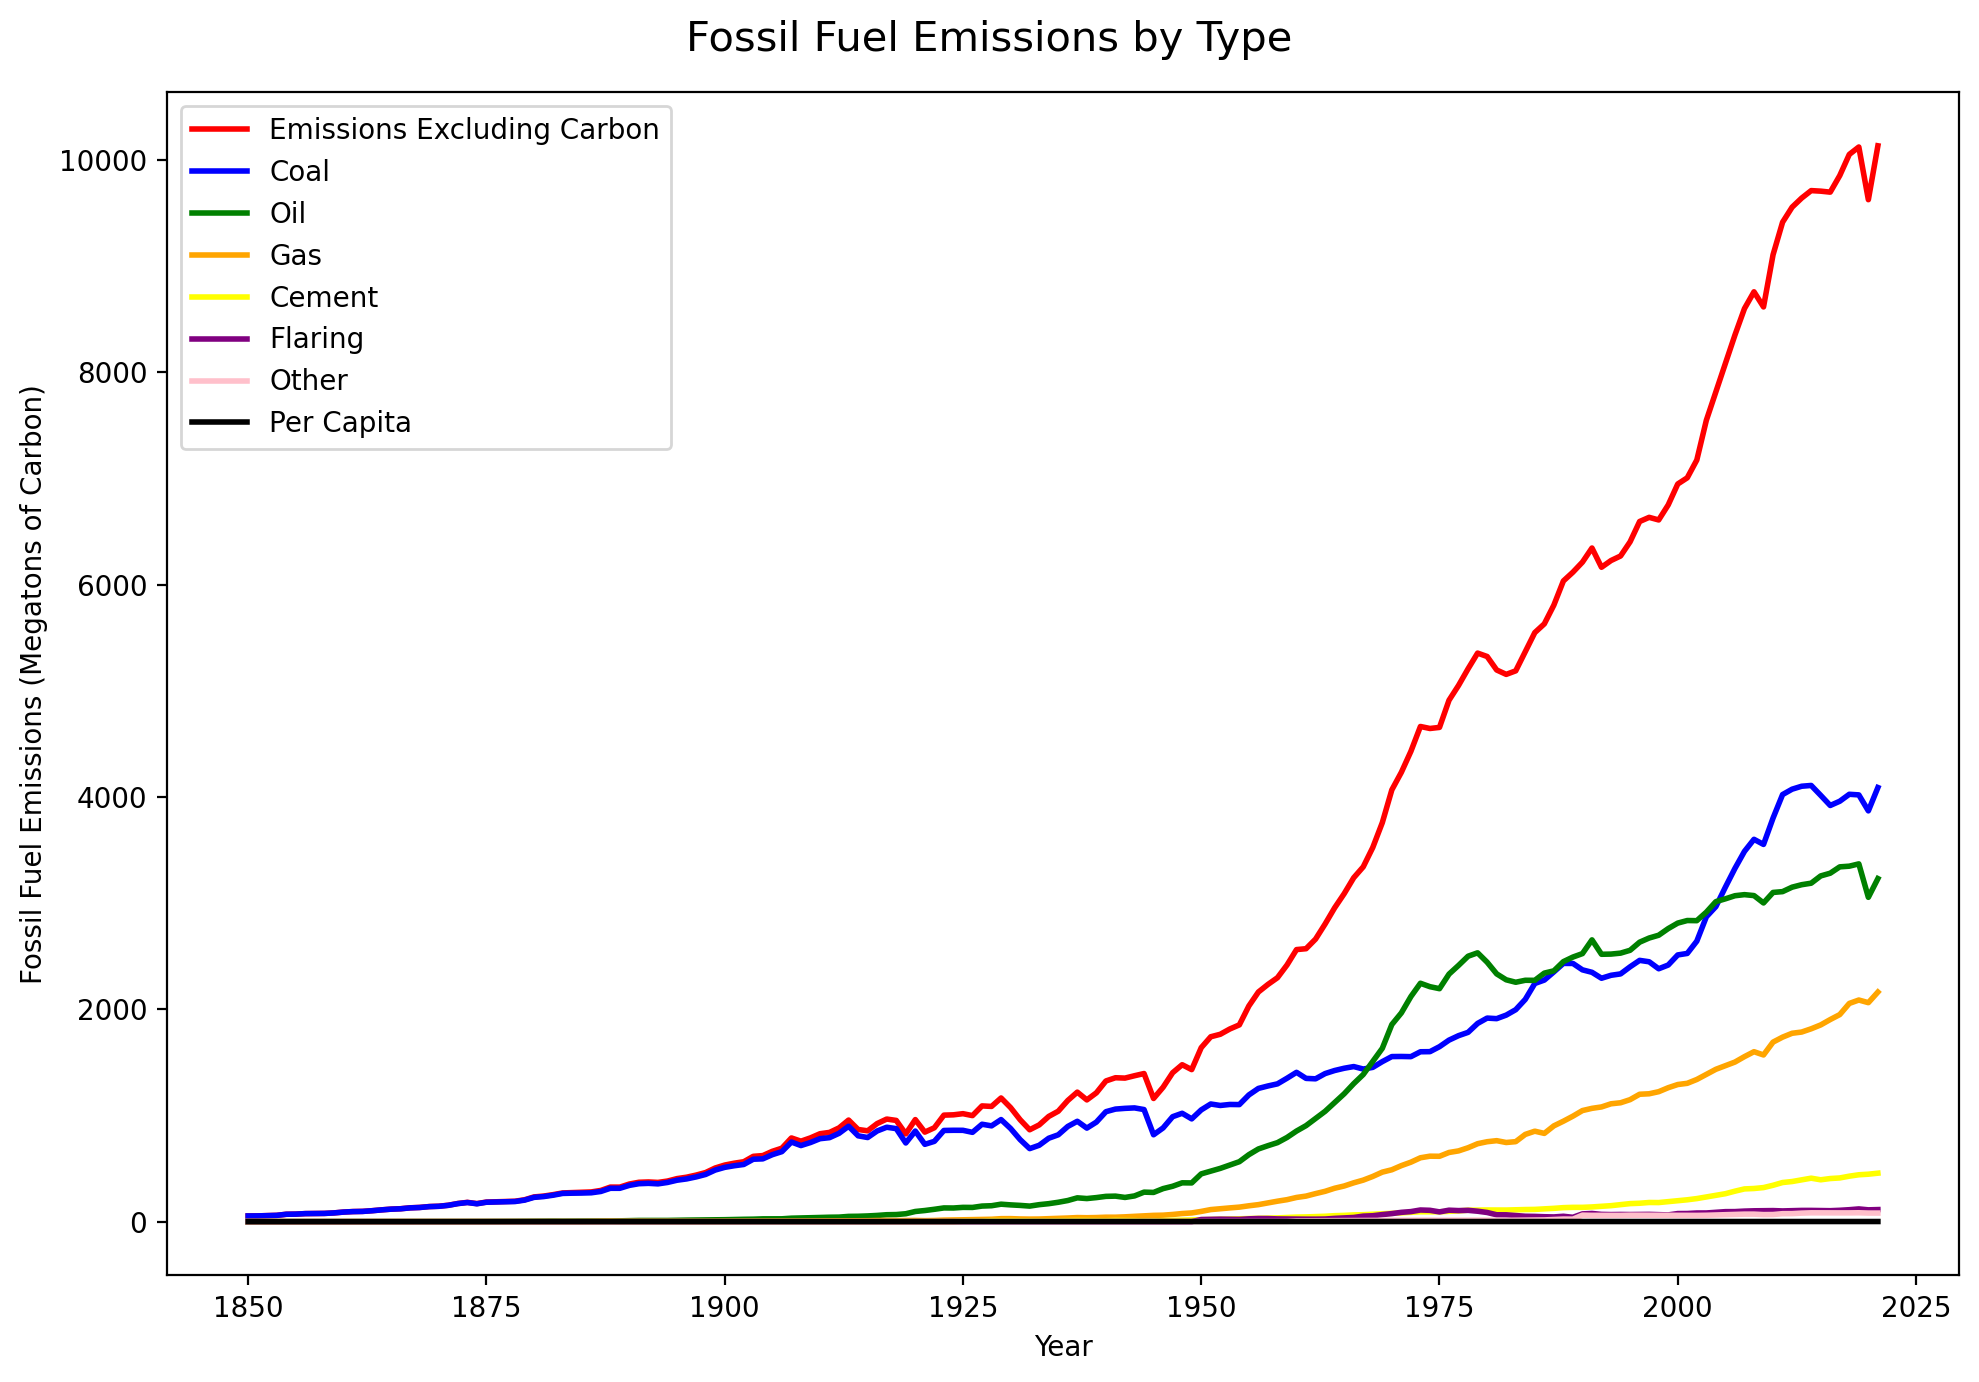

In [25]:
#plot comparing the fossil fuel emissions based on the type of contributor

fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 7))
fig.suptitle('Fossil Fuel Emissions by Type', fontsize=15)
ax1.plot(FFE_Type['Year'], FFE_Type['fossil.emissions.excluding.carbonation (MtC/yr)'], linewidth=2,label='Emissions Excluding Carbon', color='red')
ax1.plot(FFE_Type['Year'], FFE_Type['Coal (MtC/yr)'], linewidth=2, label='Coal', color='blue')
ax1.plot(FFE_Type['Year'], FFE_Type['Oil (MtC/yr)'], linewidth=2, label='Oil', color='green')
ax1.plot(FFE_Type['Year'], FFE_Type['Gas (MtC/yr)'], linewidth=2, label='Gas', color='orange')
ax1.plot(FFE_Type['Year'], FFE_Type['Cement.emission (MtC/yr)'], linewidth=2, label='Cement', color='yellow')
ax1.plot(FFE_Type['Year'], FFE_Type['Flaring (MtC/yr)'], linewidth=2, label='Flaring', color='purple')
ax1.plot(FFE_Type['Year'], FFE_Type['Other (MtC/yr)'], linewidth=2, label='Other', color='pink')
ax1.plot(FFE_Type['Year'], FFE_Type['Per.Capita (MtC/yr)'], linewidth=2, label='Per Capita', color='black')

ax1.legend()
ax1.set_ylabel('Fossil Fuel Emissions (Megatons of Carbon)')
ax1.set_xlabel('Year')

plt.tight_layout()

Figure 7: This graph explains what types of things (ex. processes) that emit fossil fuels. Coal, oil, and gas are the three biggest contributors. The total emissions excluding carbon this past year was almost 1000 Megatons of Carbon. It is clear that as time has progressed, there has been an increase in the emissions of fossil fuels from emissions excluding carbon, gas, oil, coal, and cement.

<span style="color:red"> #10 
<span style="color:black"> Fossil fuel emissions by type ranked from highest impact to lowest: Emissions excluding carbon, coal, oil, gas, cement, flaring, other, per capita.

<span style="color:red"> #7 
<span style="color:black"> The main sources of emissions of greenhouse gases are fossil fuel/indistrial emissions, coal, oil, and gas. CO2 can last 300 to 1,000 years in the atmosphere, CH4 can last up to 12 years, and N2O can last up to 120 years. CO2 is one of the more potent gases because of this, it lasts in the atmosphere for so long that it builds up into very high concentrations.

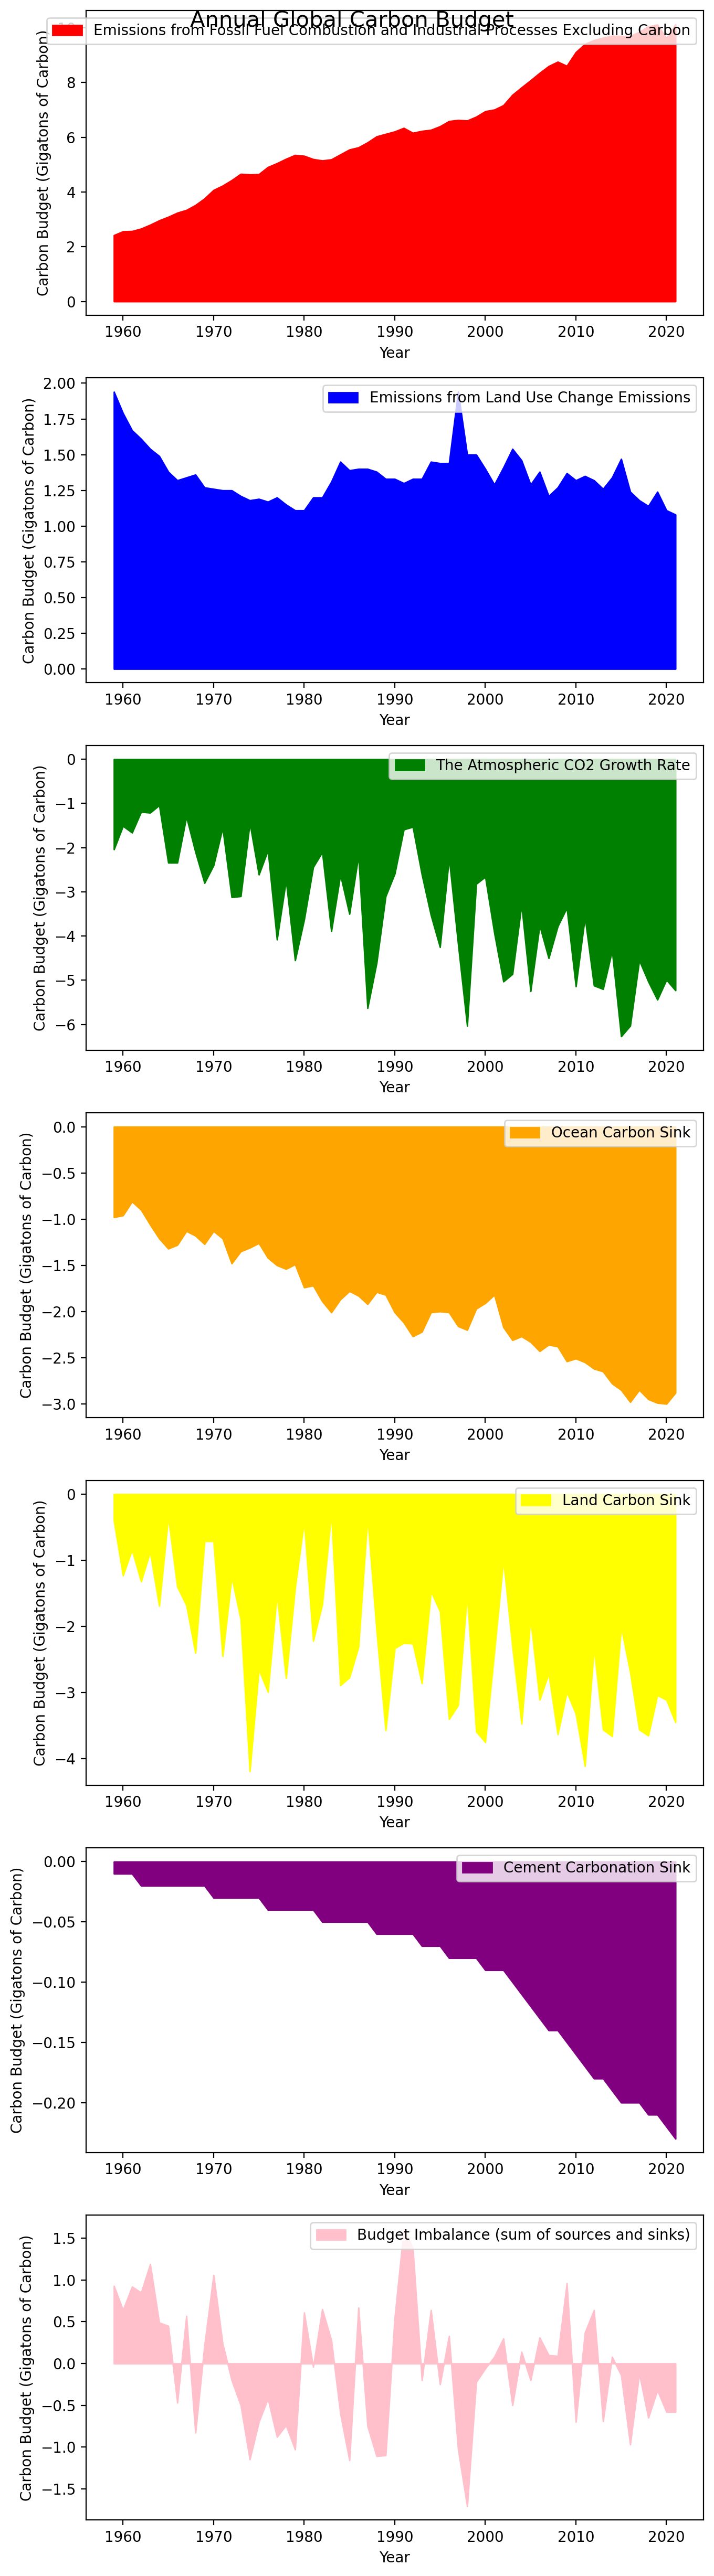

In [26]:
#plots displaying the annual global carbon budget given various changes/effects

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(nrows = 7, ncols = 1, figsize = (7, 25))
fig.suptitle('Annual Global Carbon Budget', fontsize=15)
ax1.fill_between(Global_CBudget['Year'], Global_CBudget['fossil emissions excluding carbonation'], label='Emissions from Fossil Fuel Combustion and Industrial Processes Excluding Carbon', color='red')
ax2.fill_between(Global_CBudget['Year'], Global_CBudget['land-use change emissions'],  label='Emissions from Land Use Change Emissions', color='blue')
ax3.fill_between(Global_CBudget['Year'], Global_CBudget['atmospheric growth']*-1, label='The Atmospheric CO2 Growth Rate', color='green')
ax4.fill_between(Global_CBudget['Year'], Global_CBudget['ocean sink']*-1, label='Ocean Carbon Sink', color='orange')
ax5.fill_between(Global_CBudget['Year'], Global_CBudget['land sink']*-1, label='Land Carbon Sink', color='yellow')
ax6.fill_between(Global_CBudget['Year'], Global_CBudget['cement carbonation sink']*-1, label='Cement Carbonation Sink', color='purple')
ax7.fill_between(Global_CBudget['Year'], Global_CBudget['budget imbalance'], label='Budget Imbalance (sum of sources and sinks)', color='pink')


ax1.legend()
ax1.set_ylabel('Carbon Budget (Gigatons of Carbon)')
ax1.set_xlabel('Year')
ax2.legend()
ax2.set_ylabel('Carbon Budget (Gigatons of Carbon)')
ax2.set_xlabel('Year')
ax3.legend()
ax3.set_ylabel('Carbon Budget (Gigatons of Carbon)')
ax3.set_xlabel('Year')
ax4.legend()
ax4.set_ylabel('Carbon Budget (Gigatons of Carbon)')
ax4.set_xlabel('Year')
ax5.legend()
ax5.set_ylabel('Carbon Budget (Gigatons of Carbon)')
ax5.set_xlabel('Year')
ax6.legend()
ax6.set_ylabel('Carbon Budget (Gigatons of Carbon)')
ax6.set_xlabel('Year')
ax7.legend()
ax7.set_ylabel('Carbon Budget (Gigatons of Carbon)')
ax7.set_xlabel('Year')

plt.tight_layout()

Figure 8: This figure displays a series of graphs that highlight the carbon budget given various sources of carbon, the growth of carbon dioxide concentration in the atmosphere, how much carbon is absorbed from various processes, and finally the imbalance between the sources and absorbers of carbon. There is a general upward trend in the sources, downward trend in the growth and sinks graphs, and no clear trend in the imbalance graph.

<span style="color:red"> #12 
<span style="color:black"> Based on the global carbon budget and calculating off of 2020 values, of the total carbon emitted, right now 25% is taken up by the ocean, 25% is taken up by the land, and 50% stays in the atmosphere.

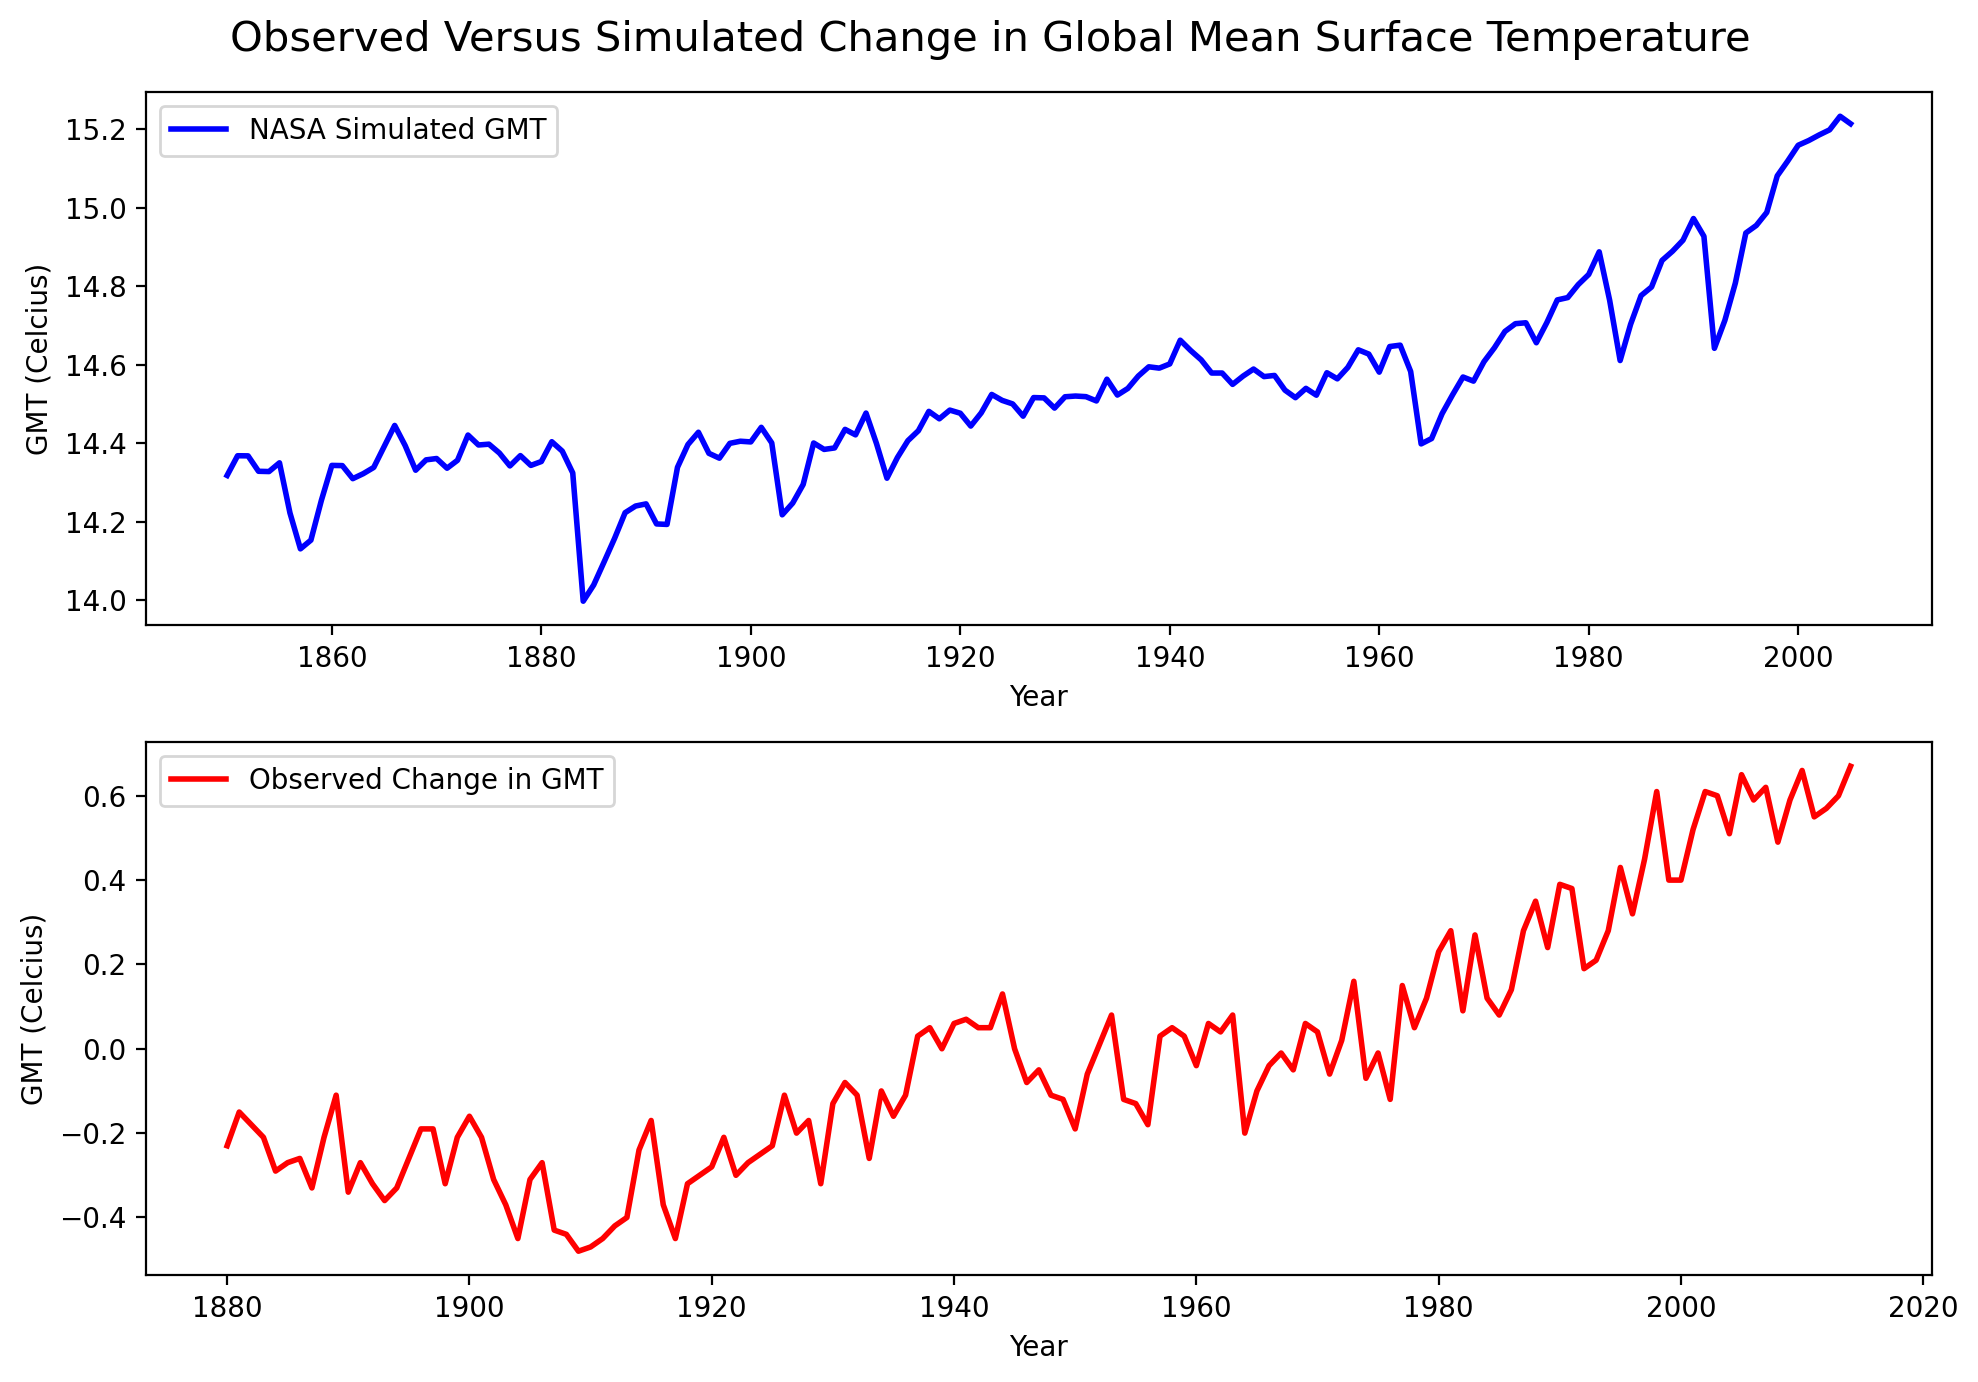

In [27]:
#plot comparing the observed change in GMT versus simulated GMT

fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 7))
fig.suptitle('Observed Versus Simulated Change in Global Mean Surface Temperature', fontsize=15)
ax1.plot(NASA_sim ['Year'], NASA_sim ['All forcings']-273.15, linewidth=2,label='NASA Simulated GMT', color='blue')
ax2.plot(Obs_Temp  ['Year'], Obs_Temp  ['Annual_Mean'], linewidth=2,label='Observed Change in GMT', color='red')

ax1.legend()
ax1.set_ylabel('GMT (Celcius)')
ax1.set_xlabel('Year')
ax2.legend()
ax2.set_ylabel('GMT (Celcius)')
ax2.set_xlabel('Year')

plt.tight_layout()


Figure 9: Featured in these graphs, is two datasets graphed regarding Global Mean Temperature. One is the simulation of surface temperature conducted by The National Aeronautics and Space Administration (NASA), and the other is the observed/measured change in surface temperature values. The simulated surface temperature displays a projected increase in surface temperature over time. This is supported by the observed change in surface temperature because after about 1980, the change in temperature becomes posivite and greater each year indicating a warming surface temperature. 

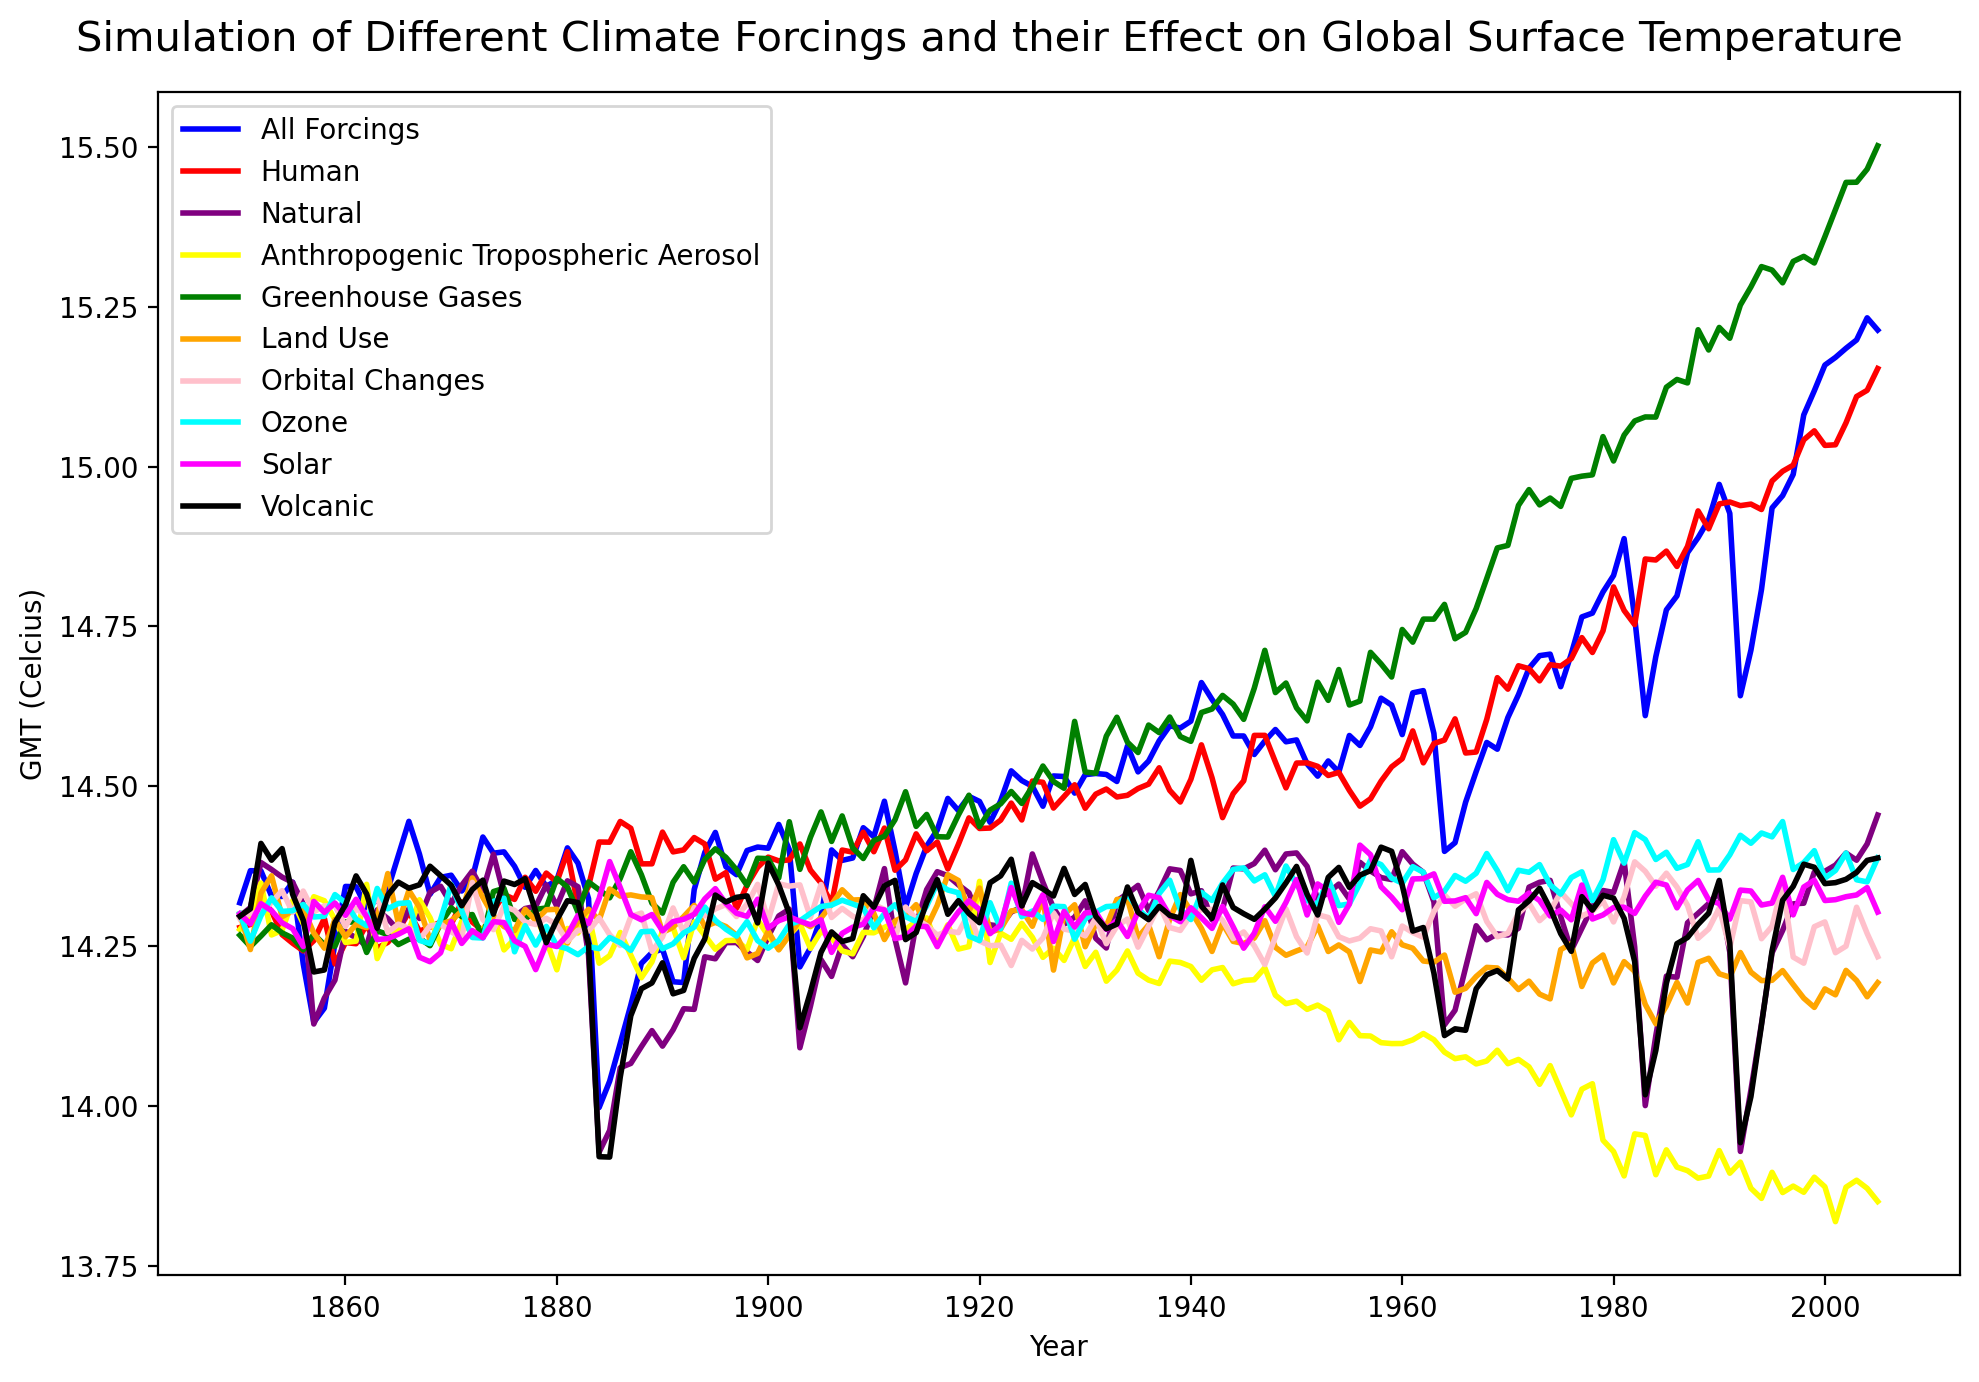

In [28]:
#plot comparing different forcing effects

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 7))
fig.suptitle('Simulation of Different Climate Forcings and their Effect on Global Surface Temperature', fontsize=15)
ax.plot(NASA_sim ['Year'], NASA_sim ['All forcings']-273.15, linewidth=2,label='All Forcings', color='blue')
ax.plot(NASA_sim   ['Year'], NASA_sim   ['Human']-273.15, linewidth=2,label='Human', color='red')
ax.plot(NASA_sim ['Year'], NASA_sim ['Natural']-273.15, linewidth=2,label='Natural', color='purple')
ax.plot(NASA_sim   ['Year'], NASA_sim['Anthropogenic tropospheric aerosol']-273.15, linewidth=2,label='Anthropogenic Tropospheric Aerosol', color='yellow')
ax.plot(NASA_sim ['Year'], NASA_sim ['Greenhouse gases']-273.15, linewidth=2,label='Greenhouse Gases', color='green')
ax.plot(NASA_sim ['Year'], NASA_sim ['Land use']-273.15, linewidth=2,label='Land Use', color='orange')
ax.plot(NASA_sim ['Year'], NASA_sim ['Orbital changes']-273.15, linewidth=2,label='Orbital Changes', color='pink')
ax.plot(NASA_sim ['Year'], NASA_sim ['Ozone']-273.15, linewidth=2,label='Ozone', color='cyan')
ax.plot(NASA_sim ['Year'], NASA_sim ['Solar']-273.15, linewidth=2,label='Solar', color='magenta')
ax.plot(NASA_sim ['Year'], NASA_sim ['Volcanic']-273.15, linewidth=2,label='Volcanic', color='black')

ax.legend()
ax.set_ylabel('GMT (Celcius)')
ax.set_xlabel('Year')



plt.tight_layout()

Figure 10: This figure displays a climate simulation where various climate forcings' effect on global surface temperature. Climate forcings are changes to the earth, natural or anthropogenic, that cause imbalances in incoming and outgoing radiation causing changes in the global mean surface temperature. Since about 1940, a lot of these forcings displayed have had a greater impact of global surface temperature. Greenhouse gases and humans have caused an increase in temperatures. The amount it is increasing temperature has also been increasing over this period time. Vice versa, anthropogenic tropospheric aerosols have had the opposite effect on temperatures. A number of the forcings have had relatively consistent effects on temperatures, but overall (as seen by the blue line) these forcings have increased global surface temperatures.

<span style="color:red"> #15 Using your analysis of the climate model experiments where the Earth system was forced with individual climate forcing agents, how and why do the following forcing agents impact Earth’s temperature
All forcings n Human n Natural n Anthropogenic n Tropospheric aerosol n Greenhouse gases n Land use n Orbital changes n Ozone n Solar n Volcanic
<span style="color:black"> By studying the climate model experiments, it is clear that climate forcings have a large impact on global mean temperature, especially when combining all of them. Greenhouse gases and humans have the largets impact on this as seen in Figure 10. There are a variety of climate forcings modeled in this climate model, and each have a very important role in affecting the environment. Humans have one of the biggest impact not only by their presence but ways that they change the Earth such as the use of factories, or building cities, etc. it is difficult to understand the impact of humans alone because humans have either caused or enhanced a large number of the climate forcings displayed. Anthropoenic effects include tropospheric aerosols which are released from industrial emissions and burning biomasses, land use changes that cause the amount of reflected and absorbed solar radiation to change, and much more. A lot of these forcings are intertwined, such as the ozone layer. As humans increase greenhouse gas concentrations through things like aerosols and land use change, the ozone layer is damaged thus causing more solar radition to remain in the Earth's atmosphere causing further increases in global mean temperatures. There are some non-human related forcings as well that occur naturally such as orbital changes and volcanic eruptions. These occur without human influence and have contributed to the natural fluxes in Eart's temperature over centuries. Orbital changes vary how close the Earth is to the sun, thus causing differences in incoming solar radiation. Volcanic eruptions distribute a lot of aerosols into the atmopshere like greenhouse gases, and release things like ash which pollute the atmosphere, but ash can cause a shade-like cover which reduces incoming solar radiation and causes some cooling of surface temperature. There is a lot of interation and variabilty within types of climate forcings so undestanding them is vital to understanding climate change.

# <span style="color:maroon"> Conclusion

Throughout this exploration of climate change, many aspects of climate change were exploredincluding greenhouse gas concentrations and surface temperature. By studying this data, it became evident that upward trends in greenhouse gas concentrations are correlated to the upwards trends in global mean surface temperature. It is also evident that humans have had a large impact on the concentrations of greenhouse gases. Anthropogenic forcing is directly related to the increase in gas concentrations, thus meaning it also has been a factor in the progression of climate change. It is important to undestand how humans are affecting this process in order to change and decrease human impact on the environment in order to preserve the Earth.